#Economic and Quality of Life Factors Influencing the Life Ladder


---


presented by Good health and Well-being

#Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import io

#Ingestion and Transformation
- import data from excel and csv including
    - mappping data: WDICountry, CLASS
    - main data: HDI_2022, LIFE_LADDER
- transfrom wide data table to long data table with `melt` for easy way to filter, select any fields that interested
- aggegrate all feature columns with 10 years period (2013 - 2022) for analysis

In [ ]:
wdi_map_path = '/content/WDICountry.csv'
dim_country_map = pd.read_csv(wdi_map_path)

In [ ]:
# Open file with error handling
with open('/content/HDI_2022.csv', 'r', encoding='utf-8', errors='ignore') as f:
    data = f.read()

df_hdi = pd.read_csv(io.StringIO(data))
dim_hdi = df_hdi.loc[~df_hdi['hdicode'].isna(), ['iso3', 'country', 'hdicode']]

In [ ]:
# melt
main_vars = ['iso3', 'country', 'hdicode', 'region']
col_names = [col for col in df_hdi.columns if col not in main_vars]

melt_hdi = df_hdi.melt( id_vars=main_vars, value_vars=col_names )
melt_hdi.columns = ['Country Code', 'Country Name', 'HDI Code', 'Region', 'Indicator', 'Value']
melt_hdi['Year'] = melt_hdi['Indicator'].apply(lambda x: x[len(x)-4:])
melt_hdi['Indicator Desc'] = melt_hdi['Indicator'].apply(lambda x: x[:-5])

In [ ]:
melt_hdi['Indicator Desc'].unique()

array(['hdi_rank', 'hdi', 'le', 'eys', 'mys', 'gnipc', 'gdi_group', 'gdi',
       'hdi_f', 'le_f', 'eys_f', 'mys_f', 'gni_pc_f', 'hdi_m', 'le_m',
       'eys_m', 'mys_m', 'gni_pc_m', 'ihdi', 'coef_ineq', 'loss',
       'ineq_le', 'ineq_edu', 'ineq_inc', 'gii_rank', 'gii', 'mmr', 'abr',
       'se_f', 'se_m', 'pr_f', 'pr_m', 'lfpr_f', 'lfpr_m',
       'rankdiff_hdi_phdi', 'phdi', 'diff_hdi_phdi', 'co2_prod', 'mf',
       'pop_total'], dtype=object)

In [ ]:
happy_pt = '/content/LIFE_LADDER.xls'
happy_df = pd.read_excel(happy_pt)

In [ ]:
happy_df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [ ]:
select_col = ['Country name', 'year', 'Life Ladder','Social support',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect']
happy_df_filter = happy_df[select_col].query('(year >= 2013) & (year <= 2022)')

select_col2 = [col for col in select_col if col != 'year']
happy_df_filter = happy_df_filter[select_col2]
happy_df_agg = happy_df_filter.groupby('Country name').mean().reset_index()

In [ ]:
dim_hdi = melt_hdi[~melt_hdi['HDI Code'].isna()].query('(Indicator == "hdi_rank_2022")')
dim_hdi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 194
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    193 non-null    object 
 1   Country Name    193 non-null    object 
 2   HDI Code        193 non-null    object 
 3   Region          150 non-null    object 
 4   Indicator       193 non-null    object 
 5   Value           193 non-null    float64
 6   Year            193 non-null    object 
 7   Indicator Desc  193 non-null    object 
dtypes: float64(1), object(7)
memory usage: 13.6+ KB


In [ ]:
happy_consl = pd.merge(happy_df_agg,
         dim_hdi,
         left_on='Country name',
         right_on='Country Name',
         how='left')

happy_consl[happy_consl['HDI Code'].isna()]['Country name'].unique()

array(['Kosovo', 'Taiwan Province of China'], dtype=object)

In [ ]:
happy_consl['Life Ladder Rank'] = happy_consl['Life Ladder'].rank(ascending=False)

In [ ]:
happy_consl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  159 non-null    object 
 1   Life Ladder                   159 non-null    float64
 2   Social support                158 non-null    float64
 3   Freedom to make life choices  158 non-null    float64
 4   Generosity                    157 non-null    float64
 5   Perceptions of corruption     152 non-null    float64
 6   Positive affect               157 non-null    float64
 7   Negative affect               157 non-null    float64
 8   Country Code                  157 non-null    object 
 9   Country Name                  157 non-null    object 
 10  HDI Code                      157 non-null    object 
 11  Region                        117 non-null    object 
 12  Indicator                     157 non-null    object 
 13  Value

#hdi console

In [ ]:
melt_hdi.query('(`Indicator Desc` == "gnipc") & (`Country Code` == "THA")')

,Country Code,Country Name,HDI Code,Region,Indicator,Value,Year,Indicator Desc
27571,THA,Thailand,Very High,EAP,gnipc_1990,7074.217175,1990,gnipc
27777,THA,Thailand,Very High,EAP,gnipc_1991,7544.220603,1991,gnipc
27983,THA,Thailand,Very High,EAP,gnipc_1992,8093.436837,1992,gnipc
28189,THA,Thailand,Very High,EAP,gnipc_1993,8682.172192,1993,gnipc
28395,THA,Thailand,Very High,EAP,gnipc_1994,9233.462764,1994,gnipc
28601,THA,Thailand,Very High,EAP,gnipc_1995,9831.295053,1995,gnipc
28807,THA,Thailand,Very High,EAP,gnipc_1996,10190.137140,1996,gnipc
29013,THA,Thailand,Very High,EAP,gnipc_1997,9736.829228,1997,gnipc
29219,THA,Thailand,Very High,EAP,gnipc_1998,8800.848424,1998,gnipc
29425,THA,Thailand,Very High,EAP,gnipc_1999,9177.642810,1999,gnipc


In [ ]:
contain = ['le', 'eys', 'mys', 'gnipc', 'edu', 'inc', 'ihdi', 'coef_ineq']
pattern = '|'.join(contain)
melt_hdi['Year'] = melt_hdi['Year'].astype(np.int64)
hdi_filter = melt_hdi[(melt_hdi['Indicator Desc'].str.contains(pattern, case=False, regex=True)) & (melt_hdi['Year'] >= 2013) & (melt_hdi['Year'] <= 2022)]


cols = ['Country Code', 'HDI Code', 'Indicator Desc', 'Value']
hdi_agg = hdi_filter[cols].groupby(['Country Code', 'HDI Code', 'Indicator Desc']).mean().reset_index()


In [ ]:
hdi_pivot = hdi_agg.pivot(index=['Country Code', 'HDI Code'], columns='Indicator Desc', values='Value')

hdi_pivot.columns.name = None
hdi_pivot = hdi_pivot.reset_index()

hdi_pivot.head()

,Country Code,HDI Code,coef_ineq,eys,eys_f,eys_m,gnipc,ihdi,ineq_edu,ineq_inc,ineq_le,le,le_f,le_m,mys,mys_f,mys_m
0,AFG,Low,34.073855,10.537798,8.009165,12.944278,1990.627774,0.313900,45.601302,28.497276,28.122987,62.7855,65.4131,60.2750,2.450579,1.326729,3.449352
1,AGO,Medium,38.882079,11.916234,11.078379,12.852543,6493.547650,0.357625,34.171440,51.068852,31.118100,61.3199,63.8172,58.8339,5.308923,4.085641,6.628580
2,ALB,High,13.417706,15.303161,15.490302,15.111232,13009.460066,0.685100,12.160064,21.693724,6.399330,78.1832,80.7453,75.9242,10.044160,9.759045,10.343180
3,AND,Very High,9.647367,11.934408,11.972211,11.915721,53434.893707,0.777429,9.518778,14.402480,5.174101,82.3721,85.1412,79.9142,10.942777,10.871019,11.014583
4,ARE,Very High,10.143840,14.839570,16.936127,13.963779,69356.653584,0.822571,12.112914,14.057700,4.958275,79.2164,81.3243,77.6136,11.787632,11.539648,11.931086


In [ ]:
consolidate_all = pd.merge(happy_consl,
         hdi_pivot,
         left_on='Country Code',
         right_on='Country Code',
         how='left')

consolidate_all = pd.merge(consolidate_all,
         dim_country_map[['Country Code', 'Income Group', 'Region']],
         left_on='Country Code',
         right_on='Country Code',
         how='left')

In [ ]:
consolidate_all.columns

Index(['Country name', 'Life Ladder', 'Social support',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Country Code', 'Country Name', 'HDI Code_x', 'Region_x', 'Indicator',
       'Value', 'Year', 'Indicator Desc', 'Life Ladder Rank', 'HDI Code_y',
       'coef_ineq', 'eys', 'eys_f', 'eys_m', 'gnipc', 'ihdi', 'ineq_edu',
       'ineq_inc', 'ineq_le', 'le', 'le_f', 'le_m', 'mys', 'mys_f', 'mys_m',
       'Income Group', 'Region_y'],
      dtype='object')

In [ ]:
select_col = ['Country Code', 'Country Name', 'HDI Code_x', 'Income Group', 'Region_y',
       'Life Ladder', 'Social support', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Life Ladder Rank', 'eys','gnipc',
              'ineq_edu', 'ineq_inc', 'ineq_le', 'le', 'mys', 'ihdi', 'coef_ineq']
consolidate_all_alias = consolidate_all[select_col]

In [ ]:
consolidate_all_alias.columns = ['Country Code', 'Country Name', 'HDI Code', 'Income Group', 'Region',
       'Life Ladder', 'Social support', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Life Ladder Rank', 'Expected Years of Schooling','GNI per capita',
        'Inequality in education', 'Inequality in income', 'Inequality in life expectancy',
        'life expectancy at birth', 'Mean Years of Schooling', 'Inequality-adjusted Human Development Index', 'Coefficient of human inequality']

#Exploring Data Analysis (EDA)

## Chapter 1: Exploring indicator

### Exploring indicator breakdown by Region

In [ ]:
select_col = ['Region', 'Life Ladder', 'GNI per capita', 'Inequality in income', 'Mean Years of Schooling', 'Perceptions of corruption', 'Inequality in education', 'Social support']
agg_indicator_by_region = consolidate_all_alias[select_col].groupby('Region').median().reset_index()

In [ ]:
def add_data_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

<ipython-input-200-f0f333442da3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], data=agg_indicator_by_region, x=x_interest, y=y_interest[0], palette='Set2')
<ipython-input-200-f0f333442da3>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
<ipython-input-200-f0f333442da3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], data=agg_indicator_by_region, x=x_interest, y=y_interest[1], palette='Set2')
<ipython-input-200-f0f333442da3>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 1].set_xticklabels(axes[0, 1].ge

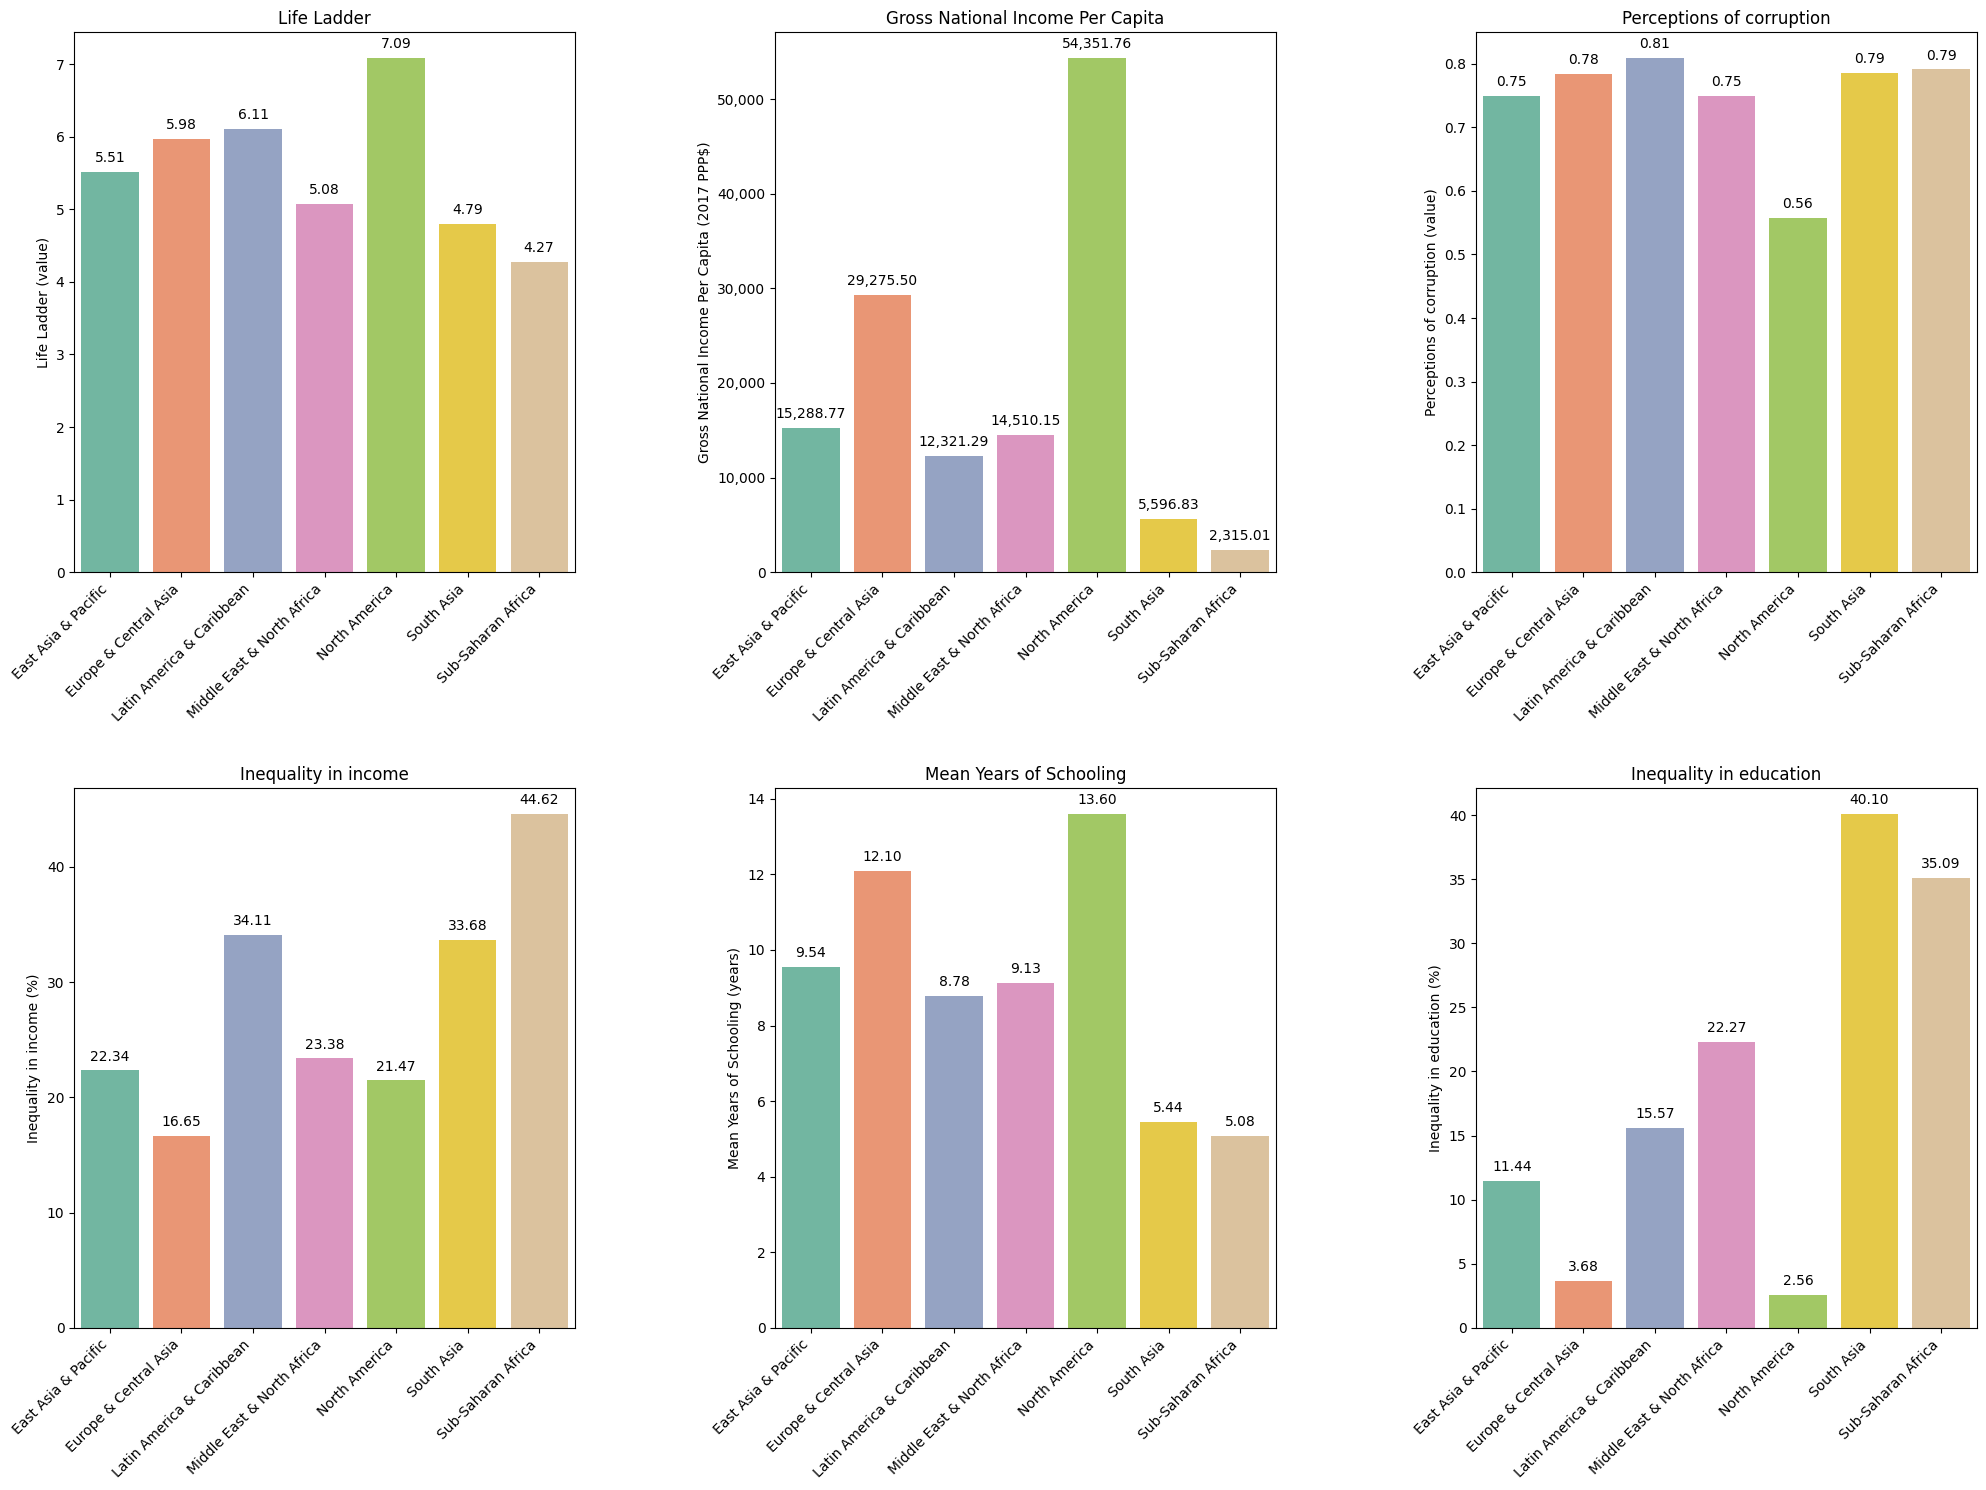

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
y_interest = ['Life Ladder', 'GNI per capita', 'Perceptions of corruption' , 'Inequality in income', 'Mean Years of Schooling', 'Inequality in education']
x_interest = 'Region'

# Life Ladder
sns.barplot(ax=axes[0, 0], data=agg_indicator_by_region, x=x_interest, y=y_interest[0], palette='Set2')
axes[0, 0].set_title('Life Ladder')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Life Ladder (value)')
add_data_labels(axes[0, 0])

# GNI per capita
sns.barplot(ax=axes[0, 1], data=agg_indicator_by_region, x=x_interest, y=y_interest[1], palette='Set2')
axes[0, 1].set_title('Gross National Income Per Capita')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Gross National Income Per Capita (2017 PPP$)')
axes[0, 1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))
add_data_labels(axes[0, 1])

# Corruption
sns.barplot(ax=axes[0, 2], data=agg_indicator_by_region, x=x_interest, y=y_interest[2], palette='Set2')
axes[0, 2].set_title('Perceptions of corruption')
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=45, ha='right')
axes[0, 2].set_xlabel('')
axes[0, 2].set_ylabel('Perceptions of corruption (value)')
add_data_labels(axes[0, 2])

# Inequality in income
sns.barplot(ax=axes[1, 0], data=agg_indicator_by_region, x=x_interest, y=y_interest[3], palette='Set2')
axes[1, 0].set_title('Inequality in income')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Inequality in income (%)')
add_data_labels(axes[1, 0])

# Mean Years of Schooling
sns.barplot(ax=axes[1, 1], data=agg_indicator_by_region, x=x_interest, y=y_interest[4], palette='Set2')
axes[1, 1].set_title('Mean Years of Schooling')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Mean Years of Schooling (years)')
add_data_labels(axes[1, 1])

# Inequality in education
sns.barplot(ax=axes[1, 2], data=agg_indicator_by_region, x=x_interest, y=y_interest[5], palette='Set2')
axes[1, 2].set_title('Inequality in education')
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=45, ha='right')
axes[1, 2].set_xlabel('')
axes[1, 2].set_ylabel('Inequality in education (%)')
add_data_labels(axes[1, 2])

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()

จากการวิเคราะห์ข้อมูลตามภูมิภาคที่ครอบคลุมหลากหลายมิติ ทั้ง Life Ladder, GNI per capita, Perceptions of Corruption, Inequality in Income, Mean Years of Schooling และ Inequality in Education ทำให้เห็นความแตกต่างอย่างชัดเจนระหว่างภูมิภาคที่มีการพัฒนาสูงกับภูมิภาคที่ยังคงเผชิญกับความท้าทายทางเศรษฐกิจและสังคม

- ภูมิภาคที่มีรายได้เฉลี่ยสูง มักจะมีความพึงพอใจในชีวิตสูง
    - North America (7.09) ซึ่งมีรายได้เฉลี่ยต่อหัว (GNI per capita) สูงสุดที่ 43,531.76 USD แสดงถึงความพึงพอใจในชีวิตที่สูง การมีรายได้ต่อหัวที่สูงมีส่วนช่วยให้ประชาชนสามารถเข้าถึงโอกาสทางเศรษฐกิจ สังคม และการพัฒนาอื่นๆ ได้อย่างเต็มที่ ซึ่งส่งผลให้พวกเขามีความพึงพอใจในชีวิตมากขึ้น
	- Sub-Saharan Africa (2,315.01 USD) และ South Asia (5,596.83 USD) มี GNI per capita ต่ำที่สุด ส่งผลให้ประชาชนในภูมิภาคเหล่านี้มี Life Ladder ต่ำเช่นกัน (4.27 และ 4.79) สะท้อนถึงข้อจำกัดในด้านรายได้และโอกาสที่ส่งผลต่อคุณภาพชีวิตที่ต่ำ
- การกระจายรายได้ที่เท่าเทียมมีส่วนในการเพิ่มความพึงพอใจในชีวิต
	- Sub-Saharan Africa มีความไม่เท่าเทียมในรายได้สูงสุด (44.62%) ซึ่งส่งผลทำให้ประชาชนในภูมิภาคนี้มีความพึงพอใจในชีวิตต่ำที่สุด เนื่องจากการกระจายรายได้ที่ไม่เท่าเทียมทำให้กลุ่มคนจนไม่ได้รับโอกาสเท่าเทียมกันในการพัฒนาคุณภาพชีวิต
	- ในทางกลับกัน Europe & Central Asia มีความไม่เท่าเทียมในรายได้ต่ำที่สุด (16.65%) ส่งผลให้มี Life Ladder สูง (5.98) การกระจายรายได้ที่เท่าเทียมช่วยให้ประชาชนรู้สึกว่าได้รับโอกาสที่เหมาะสมในการพัฒนาคุณภาพชีวิต ซึ่งทำให้พวกเขาพึงพอใจในชีวิตมากขึ้น
- การศึกษาเป็นปัจจัยสำคัญต่อคุณภาพชีวิต
	- ภูมิภาคที่มีค่าเฉลี่ยของจำนวนปีที่ประชาชนได้รับการศึกษา (Mean Years of Schooling) สูง เช่น North America (13.60 ปี) และ Europe & Central Asia (11.89 ปี) มีความพึงพอใจในชีวิตที่สูง แสดงให้เห็นว่าการศึกษาช่วยเพิ่มทักษะและโอกาสในการทำงาน ซึ่งส่งผลต่อความเป็นอยู่ที่ดีขึ้นของประชาชน
	- ในขณะเดียวกัน ภูมิภาคที่มีค่าเฉลี่ยการศึกษาต่ำ เช่น South Asia (5.44 ปี) และ Sub-Saharan Africa (5.08 ปี) มีความพึงพอใจในชีวิตต่ำเช่นกัน เนื่องจากการเข้าถึงการศึกษาที่จำกัดทำให้ประชาชนขาดโอกาสในการพัฒนาตนเองและชีวิตในด้านต่างๆ
- 	การรับรู้ถึงการคอร์รัปชันมีผลกระทบต่อความเชื่อมั่นและความพึงพอใจในชีวิต
	- North America มี Perceptions of Corruption ต่ำที่สุด (0.56) ซึ่งแสดงถึงความไว้วางใจในรัฐบาลและระบบการบริหารที่มีความโปร่งใสและเสถียร ความโปร่งใสของรัฐบาลช่วยสร้างความมั่นใจในระบบสาธารณะ ซึ่งส่งผลให้ประชาชนมีความพึงพอใจในชีวิตมากขึ้น
	- ในทางตรงกันข้าม South Asia และ Sub-Saharan Africa ที่มีการรับรู้ถึงคอร์รัปชันสูง (0.79) มีผลต่อความพึงพอใจในชีวิตที่ต่ำ เพราะการรับรู้ว่าระบบการบริหารมีความทุจริตทำให้ประชาชนขาดความเชื่อมั่นในรัฐบาลและระบบสังคม
- ความไม่เท่าเทียมทางการศึกษาส่งผลต่อความไม่เท่าเทียมทางรายได้
	- South Asia (40.10%) และ Sub-Saharan Africa (35.09%) มีความไม่เท่าเทียมในการศึกษาในระดับสูง การขาดโอกาสในการเข้าถึงการศึกษาที่เท่าเทียมทำให้ประชากรขาดทักษะและความรู้ ซึ่งส่งผลโดยตรงต่อโอกาสในการทำงานและรายได้ในอนาคต ทำให้ความไม่เท่าเทียมทางรายได้สูงขึ้นตามมา
	- ในทางกลับกัน Europe & Central Asia (3.68%) มีความไม่เท่าเทียมทางการศึกษาต่ำที่สุด ซึ่งสะท้อนให้เห็นว่าประชาชนในภูมิภาคนี้ได้รับโอกาสทางการศึกษาในระดับที่เท่าเทียมกันมากกว่า และส่งผลให้รายได้มีการกระจายอย่างเท่าเทียมมากขึ้นด้วย

### Exploring indicator breakdown by Income group

In [ ]:
select_col = ['Income Group', 'Life Ladder', 'GNI per capita', 'Inequality in income', 'Mean Years of Schooling', 'Perceptions of corruption', 'Inequality in education', 'Social support']
agg_indicator_by_income_group = consolidate_all_alias[select_col].groupby('Income Group').median().reset_index()

<ipython-input-202-17863e7e1dda>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], data=agg_indicator_by_income_group, x=x_interest, y=y_interest[0], palette='Set2', order=custom_order)
<ipython-input-202-17863e7e1dda>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
<ipython-input-202-17863e7e1dda>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], data=agg_indicator_by_income_group, x=x_interest, y=y_interest[1], palette='Set2', order=custom_order)
<ipython-input-202-17863e7e1dda>:17: UserWarning: FixedFormatter should only be used together with Fix

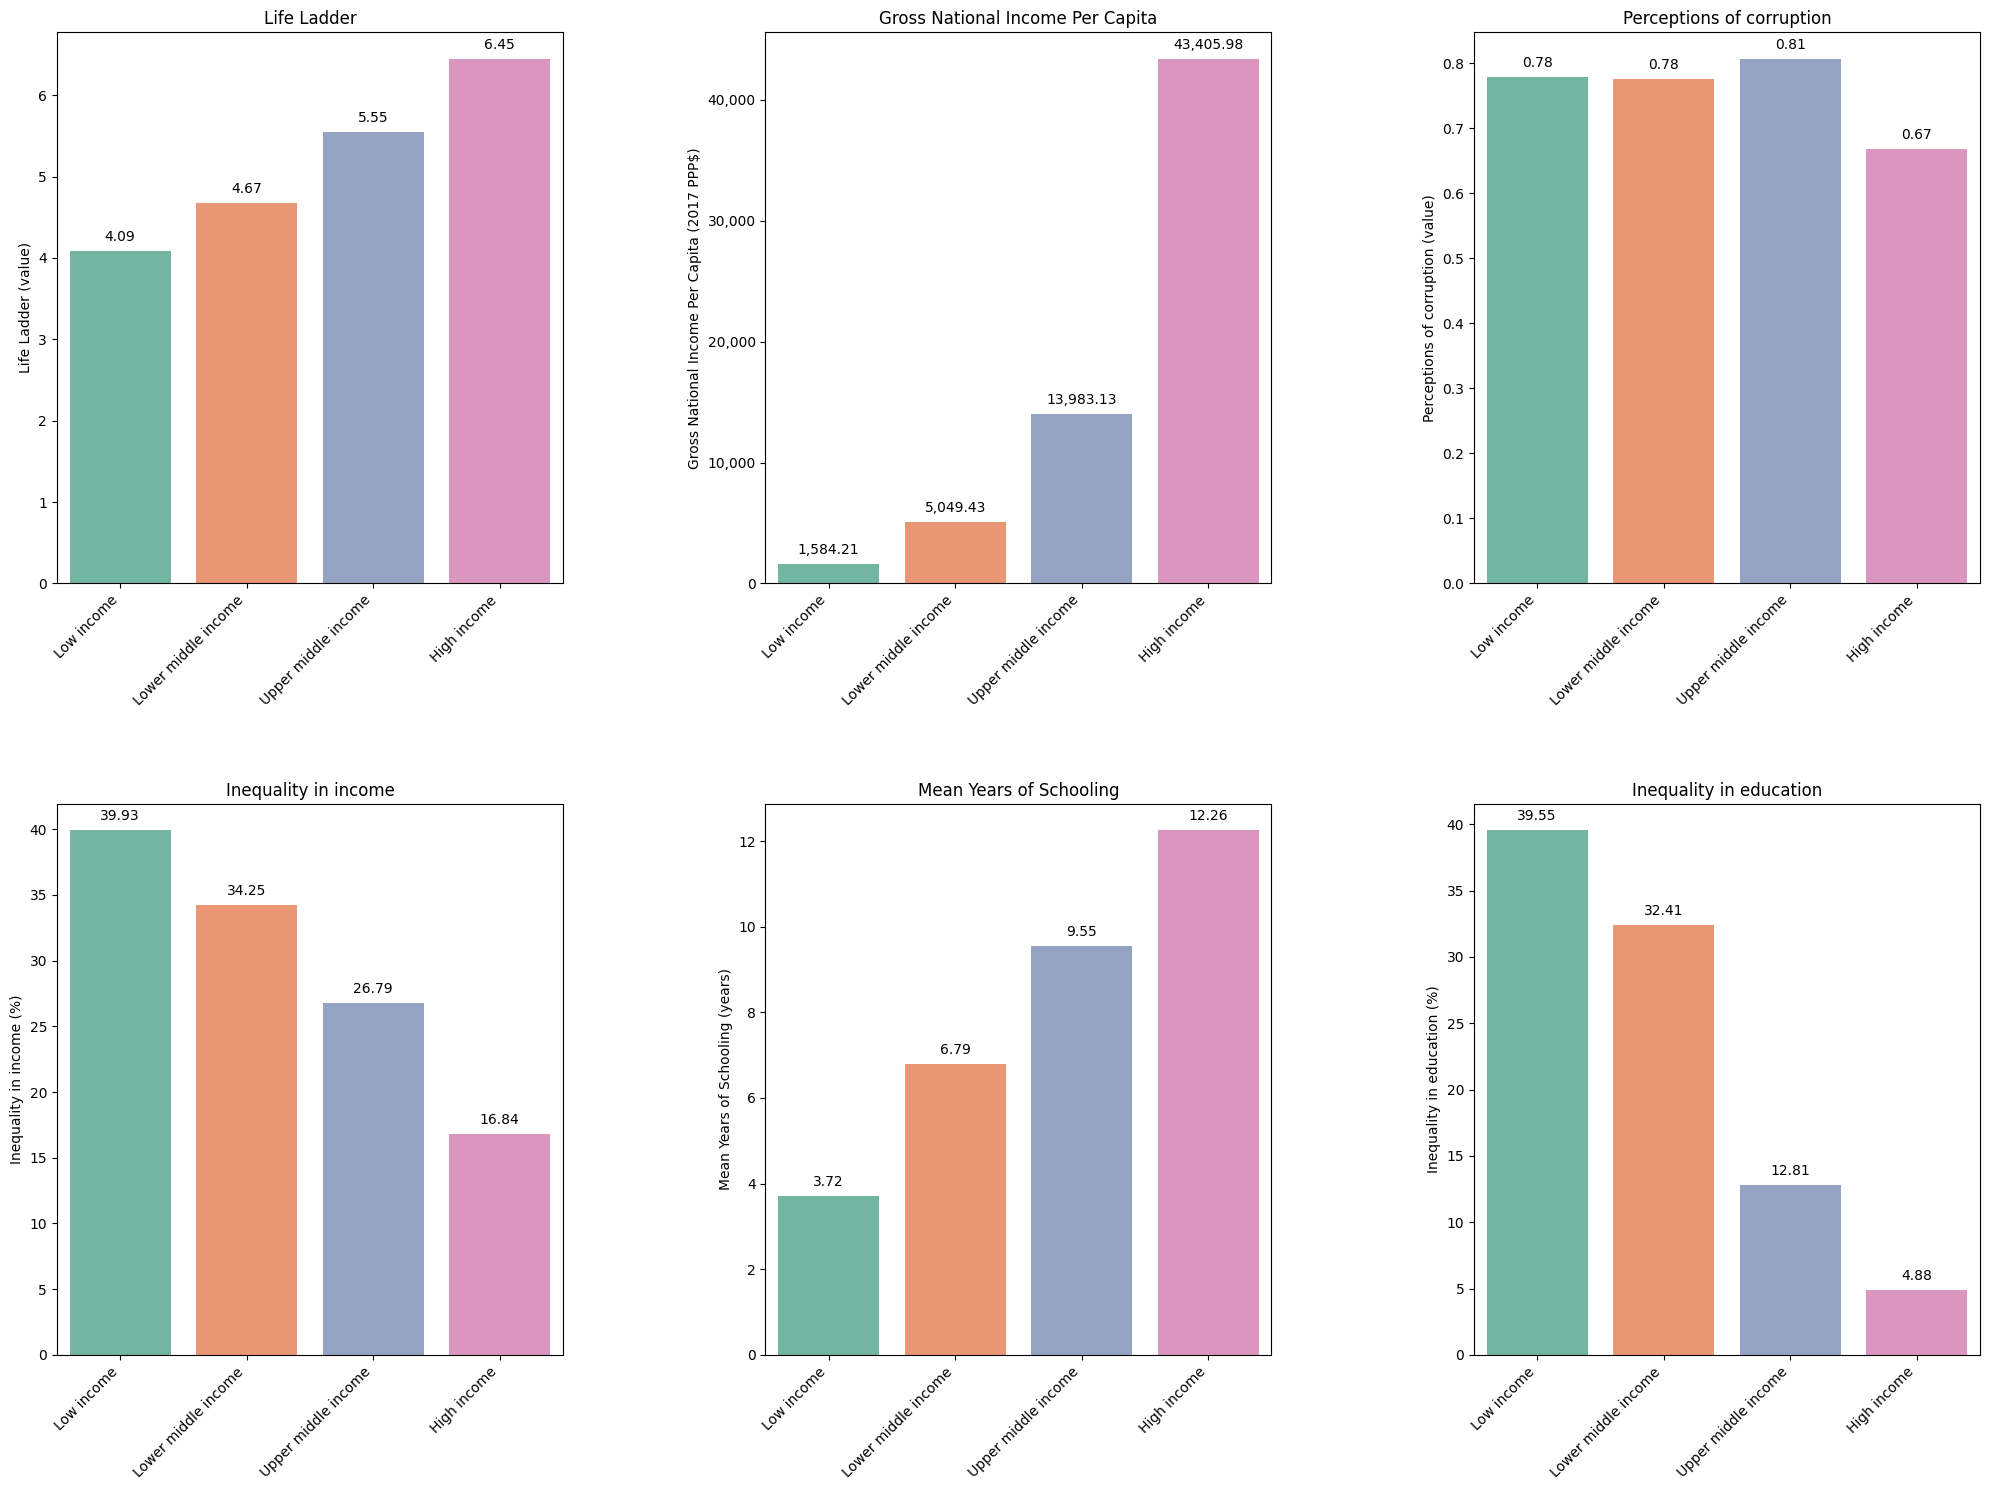

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
y_interest = ['Life Ladder', 'GNI per capita', 'Perceptions of corruption' , 'Inequality in income', 'Mean Years of Schooling', 'Inequality in education']
x_interest = 'Income Group'
custom_order = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']

# Life Ladder
sns.barplot(ax=axes[0, 0], data=agg_indicator_by_income_group, x=x_interest, y=y_interest[0], palette='Set2', order=custom_order)
axes[0, 0].set_title('Life Ladder')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Life Ladder (value)')
add_data_labels(axes[0, 0])

# Gross National Income Per Capita
sns.barplot(ax=axes[0, 1], data=agg_indicator_by_income_group, x=x_interest, y=y_interest[1], palette='Set2', order=custom_order)
axes[0, 1].set_title('Gross National Income Per Capita')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Gross National Income Per Capita (2017 PPP$)')
axes[0, 1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))
add_data_labels(axes[0, 1])

# กPerceptions of corruption
sns.barplot(ax=axes[0, 2], data=agg_indicator_by_income_group, x=x_interest, y=y_interest[2], palette='Set2', order=custom_order)
axes[0, 2].set_title('Perceptions of corruption')
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=45, ha='right')
axes[0, 2].set_xlabel('')
axes[0, 2].set_ylabel('Perceptions of corruption (value)')
add_data_labels(axes[0, 2])

# Inequality in income
sns.barplot(ax=axes[1, 0], data=agg_indicator_by_income_group, x=x_interest, y=y_interest[3], palette='Set2', order=custom_order)
axes[1, 0].set_title('Inequality in income')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Inequality in income (%)')
add_data_labels(axes[1, 0])

# Mean Years of Schooling
sns.barplot(ax=axes[1, 1], data=agg_indicator_by_income_group, x=x_interest, y=y_interest[4], palette='Set2', order=custom_order)
axes[1, 1].set_title('Mean Years of Schooling')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Mean Years of Schooling (years)')
add_data_labels(axes[1, 1])

# Inequality in education
sns.barplot(ax=axes[1, 2], data=agg_indicator_by_income_group, x=x_interest, y=y_interest[5], palette='Set2', order=custom_order)
axes[1, 2].set_title('Inequality in education')
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=45, ha='right')
axes[1, 2].set_xlabel('')
axes[1, 2].set_ylabel('Inequality in education (%)')
add_data_labels(axes[1, 2])

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

### Exploring indicator breakdown by HDI group

In [ ]:
select_col = ['HDI Code', 'Life Ladder', 'GNI per capita', 'Inequality in income', 'Mean Years of Schooling', 'Perceptions of corruption', 'Inequality in education', 'Social support']
agg_indicator_by_hdi = consolidate_all_alias[select_col].groupby('HDI Code').median().reset_index()

<ipython-input-204-28686852ad17>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], data=agg_indicator_by_hdi, x=x_interest, y=y_interest[0], palette='Set2', order=custom_order)
<ipython-input-204-28686852ad17>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
<ipython-input-204-28686852ad17>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], data=agg_indicator_by_hdi, x=x_interest, y=y_interest[1], palette='Set2', order=custom_order)
<ipython-input-204-28686852ad17>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0

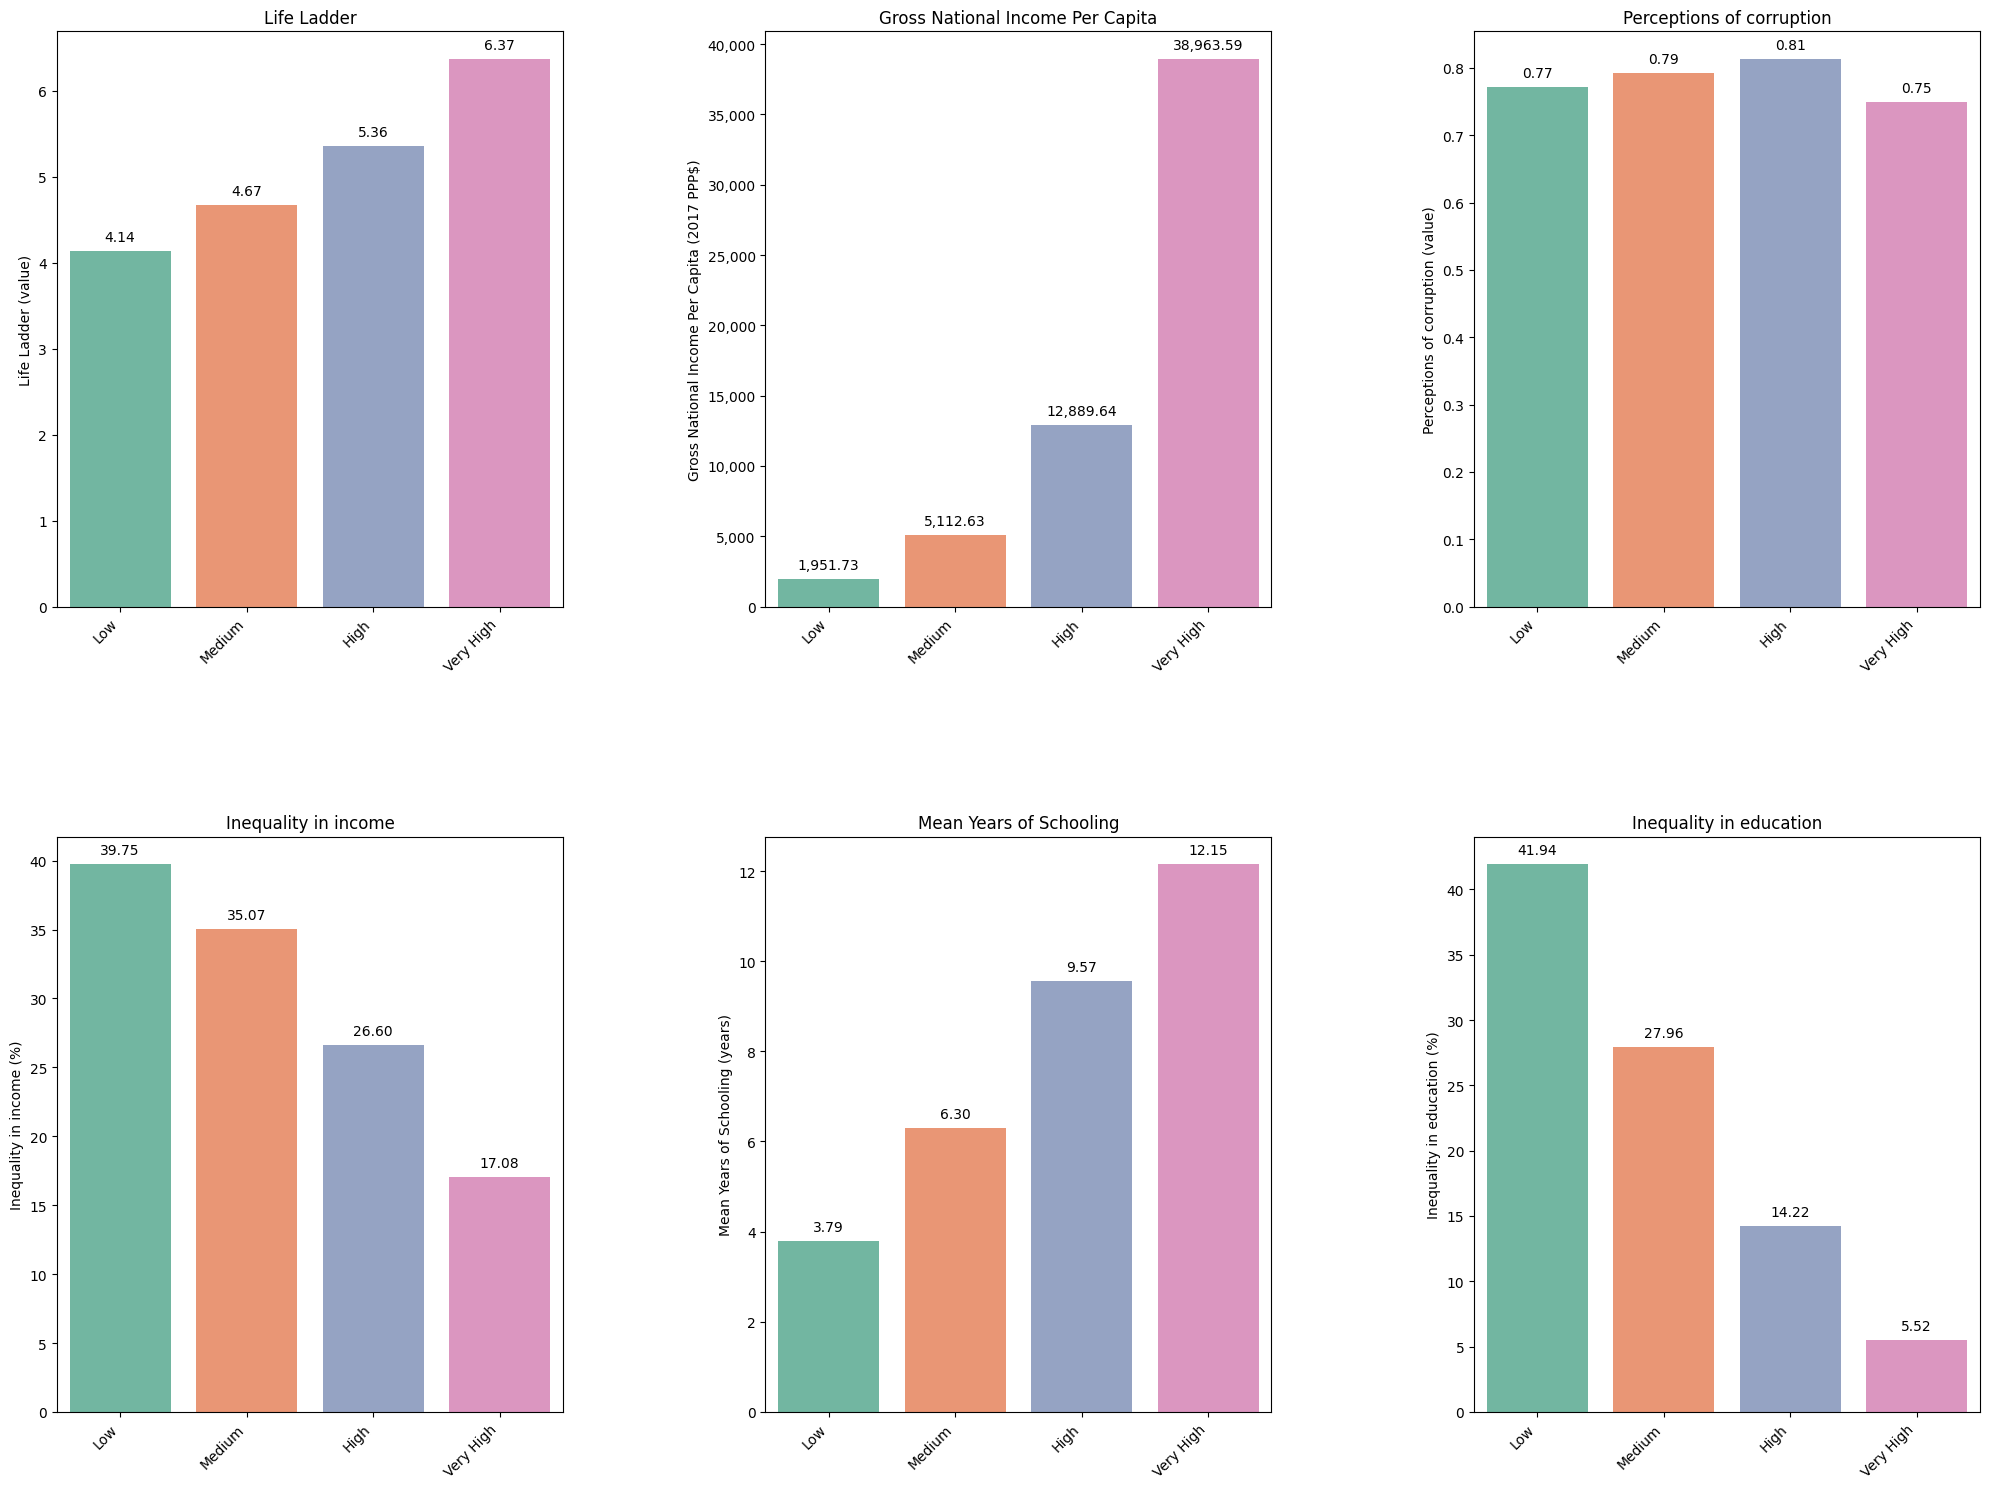

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
y_interest = ['Life Ladder', 'GNI per capita', 'Perceptions of corruption' , 'Inequality in income', 'Mean Years of Schooling', 'Inequality in education']
x_interest = 'HDI Code'
custom_order = ['Low', 'Medium', 'High', 'Very High']

# Life Ladder
sns.barplot(ax=axes[0, 0], data=agg_indicator_by_hdi, x=x_interest, y=y_interest[0], palette='Set2', order=custom_order)
axes[0, 0].set_title('Life Ladder')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Life Ladder (value)')
add_data_labels(axes[0, 0])

# GNI per capita
sns.barplot(ax=axes[0, 1], data=agg_indicator_by_hdi, x=x_interest, y=y_interest[1], palette='Set2', order=custom_order)
axes[0, 1].set_title('Gross National Income Per Capita')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Gross National Income Per Capita (2017 PPP$)')
axes[0, 1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))
add_data_labels(axes[0, 1])

# Perceptions of corruption
sns.barplot(ax=axes[0, 2], data=agg_indicator_by_hdi, x=x_interest, y=y_interest[2], palette='Set2', order=custom_order)
axes[0, 2].set_title('Perceptions of corruption')
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=45, ha='right')
axes[0, 2].set_xlabel('')
axes[0, 2].set_ylabel('Perceptions of corruption (value)')
add_data_labels(axes[0, 2])

# Inequality in income
sns.barplot(ax=axes[1, 0], data=agg_indicator_by_hdi, x=x_interest, y=y_interest[3], palette='Set2', order=custom_order)
axes[1, 0].set_title('Inequality in income')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Inequality in income (%)')
add_data_labels(axes[1, 0])

# Mean Years of Schooling
sns.barplot(ax=axes[1, 1], data=agg_indicator_by_hdi, x=x_interest, y=y_interest[4], palette='Set2', order=custom_order)
axes[1, 1].set_title('Mean Years of Schooling')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Mean Years of Schooling (years)')
add_data_labels(axes[1, 1])

# Inequality in education
sns.barplot(ax=axes[1, 2], data=agg_indicator_by_hdi, x=x_interest, y=y_interest[5], palette='Set2', order=custom_order)
axes[1, 2].set_title('Inequality in education')
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=45, ha='right')
axes[1, 2].set_xlabel('')
axes[1, 2].set_ylabel('Inequality in education (%)')
add_data_labels(axes[1, 2])

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()

คุณภาพชีวิตที่ดี (HDI) ส่งผลโดยตรงต่อการเพิ่มความพึงพอใจในชีวิต (Life Ladder)
- การพัฒนาคุณภาพชีวิตที่เพิ่มขึ้นซึ่งวัดจากรายได้ต่อหัว (GNI per capita), การศึกษา (Mean Years of Schooling), และอายุขัยเฉลี่ย แสดงให้เห็นว่าประเทศที่มีการพัฒนามนุษย์ในทุกมิติมีแนวโน้มทีความพึงพอใจในชีวิตจะเพิ่มขึ้นเช่นกัน
- ประเทศที่อยู่ในกลุ่มคุณภาพชีวิตแบบ Very High  จะมี ความพึงพอใจในชีวิตสูงที่สุด สะท้อนถึงคุณภาพชีวิตและความพึงพอใจที่ดีขึ้นเมื่อประชากรมีโอกาสทางการศึกษาและรายได้ที่เพิ่มขึ้น
- กลุ่มที่มีคุณภาพชีวิตแบบ Low เช่น Sub-Saharan Africa มีความพึงพอใจต่ำ แสดงถึงข้อจำกัดในการเข้าถึงการศึกษาและทรัพยากรที่ทำให้ประชาชนมีความพึงพอใจในชีวิตต่ำลง

แต่การมีคุณภาพชีวิตที่ดีไม่ได้หมายความว่าปัญหาทุจริตและคอร์รัปชันจะหมดไป
- แม้ประเทศที่มีคุณภาพชีวิตที่สูง เช่น Very High จะมีคุณภาพชีวิตที่ดี แต่การรับรู้ถึงคอร์รัปชัน (Perceptions of Corruption) ยังคงสูงในบางกลุ่ม ซึ่งแสดงถึงความท้าทายในการลดปัญหาการทุจริต แม้คุณภาพชีวิตจะดีขึ้น

การลดความไม่เท่าเทียมในมิติต่างๆ จะช่วยเพิ่มความพึงพอใจในชีวิต
- การลดความไม่เท่าเทียมทางการศึกษาและรายได้ในประเทศที่มีคุณภาพต่ำ จะช่วยให้ประชาชนมีโอกาสที่เท่าเทียมกันมากขึ้น และส่งผลให้ความพึงพอใจสูงขึ้นตามไปด้วย

การพัฒนาคุณภาพชีวิตผ่านการเพิ่มโอกาสทางการศึกษา รายได้ และการลดความไม่เท่าเทียม เป็นปัจจัยสำคัญที่ส่งผลต่อการเพิ่มความพึงพอใจในชีวิต (Life Ladder) อย่างไรก็ตาม การลดปัญหาคอร์รัปชันยังคงเป็นสิ่งสำคัญแม้ว่าคุณภาพชีวิตในด้านอื่นๆ จะดีขึ้นแล้วก็ตาม

##Chapter 2: Compare indicators across group

###Correlation across all indicators

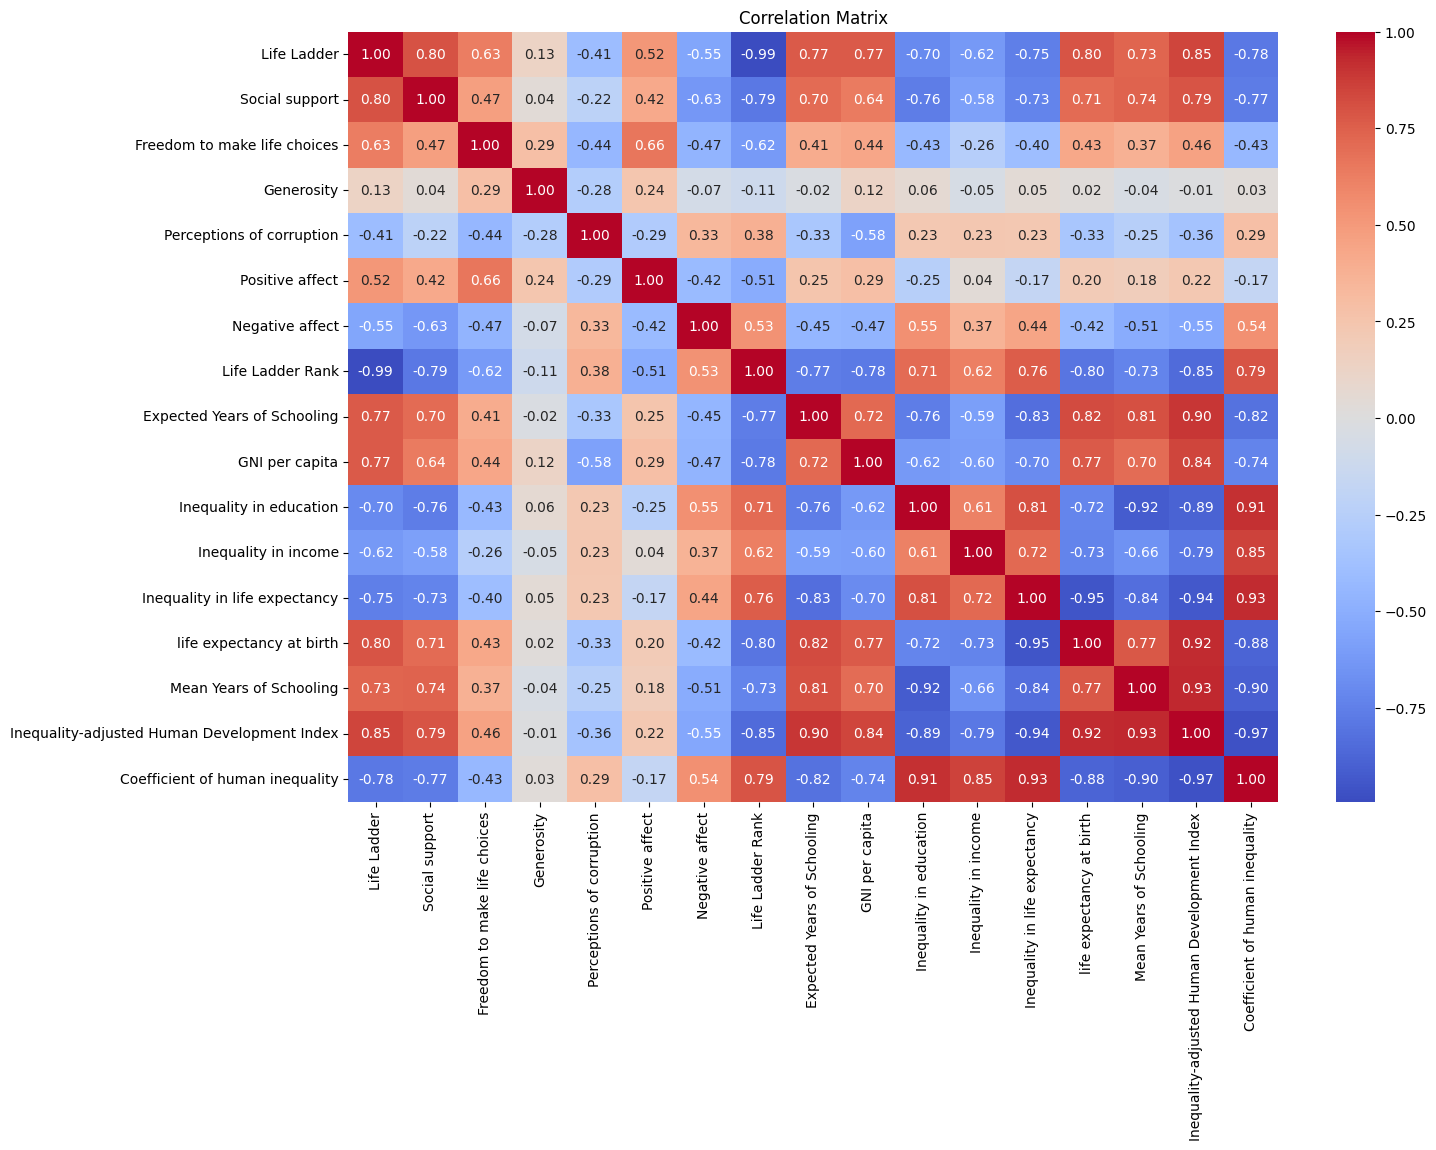

In [ ]:
numeric_df = consolidate_all_alias.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

###Social support vs. Gross National Income per capita

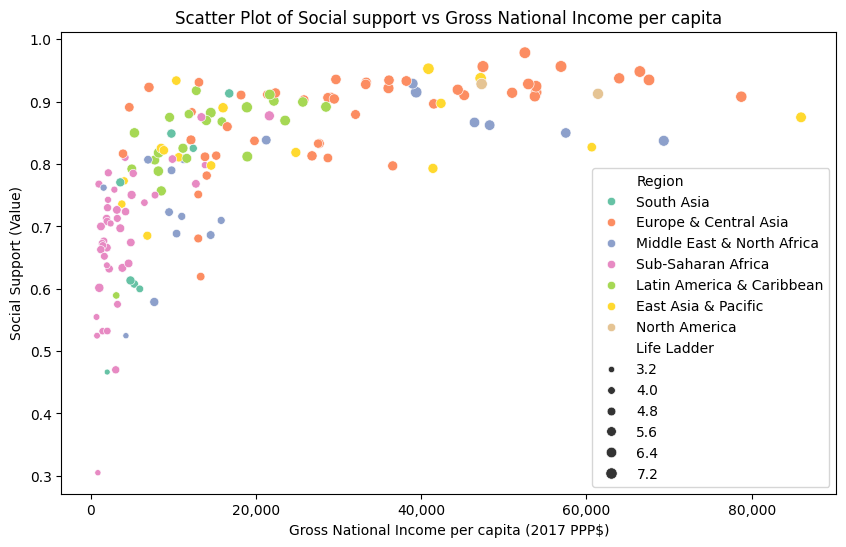

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=consolidate_all_alias, x='GNI per capita', y='Social support', hue='Region',size = 'Life Ladder', palette='Set2')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.title('Scatter Plot of Social support vs Gross National Income per capita')
plt.xlabel('Gross National Income per capita (2017 PPP$)')
plt.ylabel('Social Support (Value)')

plt.show()

**ความสัมพันธ์ระหว่าง Social support และ GNI per capita**


---

รายได้ประชาชาติต่อหัวที่สูงขึ้นมีบทบาทสำคัญในการเพิ่มระดับการสนับสนุนทางสังคมและความสุขของประชากร

ประเทศที่มีรายได้สูงมักมีโครงสร้างสังคมที่ดีขึ้น ส่งผลให้ประชาชนมีความสุขมากขึ้น ขณะที่ประเทศที่มีรายได้ต่ำต้องเผชิญกับปัญหาทางเศรษฐกิจและสังคมซึ่งลดทอนคุณภาพชีวิตและความสุข.

###Social support vs. Life Expectancy at Birth

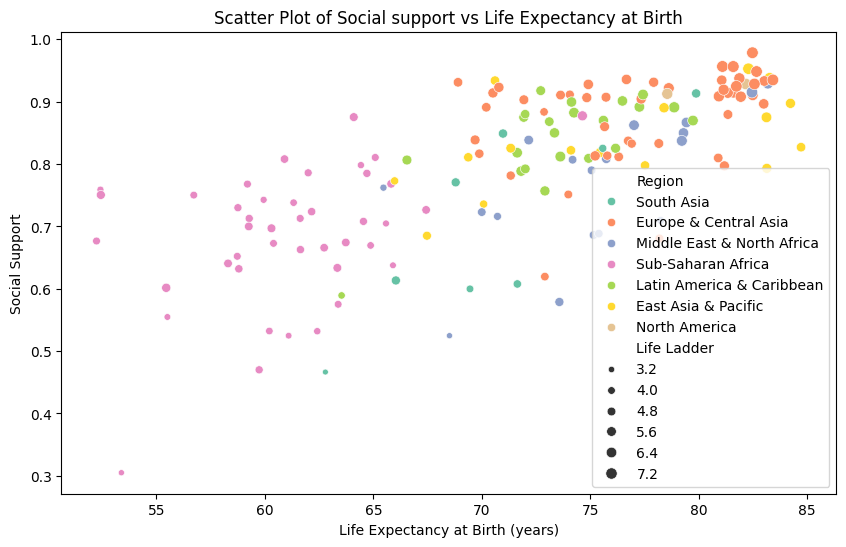

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=consolidate_all_alias, x='life expectancy at birth', y='Social support', hue='Region',size = 'Life Ladder', palette='Set2')

plt.title('Scatter Plot of Social support vs Life Expectancy at Birth')
plt.xlabel('Life Expectancy at Birth (years)')
plt.ylabel('Social Support')

plt.show()

**ความสัมพันธ์ระหว่าง Social support และ Life Expectancy at Birth**


---

อายุขัยเฉลี่ยที่สูงสะท้อนถึงคุณภาพชีวิตที่ดีขึ้น และยังส่งผลให้การสนับสนุนทางสังคมแข็งแกร่งขึ้น ซึ่งมีผลเชิงบวกต่อความสุขของประชาชน ประเทศที่มีอายุขัยเฉลี่ยสูงมักมีระบบสังคมที่มั่นคงและทำให้ผู้คนมีความสุขมากขึ้น ขณะที่ประเทศที่มีอายุขัยต่ำต้องเผชิญกับปัญหาทางสุขภาพและสังคมที่ลดคุณภาพชีวิตและความสุขโดยรวม


###Social support vs. Mean Years of Schooling

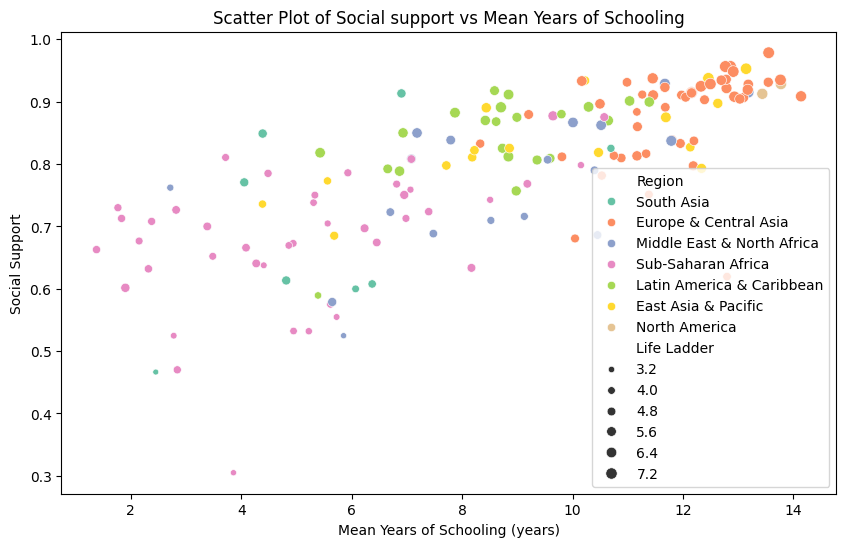

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=consolidate_all_alias, x='Mean Years of Schooling', y='Social support', hue='Region',size = 'Life Ladder', palette='Set2')

plt.title('Scatter Plot of Social support vs Mean Years of Schooling')
plt.xlabel('Mean Years of Schooling (years)')
plt.ylabel('Social Support')

plt.show()

**ความสัมพันธ์ระหว่าง Social support และ Mean Years of Schooling**

---


การศึกษามีบทบาทสำคัญในการส่งเสริมการสนับสนุนทางสังคม การมีปีการศึกษาเฉลี่ยที่สูงช่วยเสริมสร้างความเข้าใจและการสนับสนุนในสังคม ซึ่งนำไปสู่ความสุขของประชากรที่มากขึ้น ประเทศที่มีระดับการศึกษาต่ำมักเผชิญกับปัญหาการสนับสนุนทางสังคมและคุณภาพชีวิตที่ลดลง ทำให้ความสุขโดยรวมของประชาชนต่ำกว่าประเทศที่มีการศึกษาดี

###Freedom to make life choices vs. Gross National Income per capita

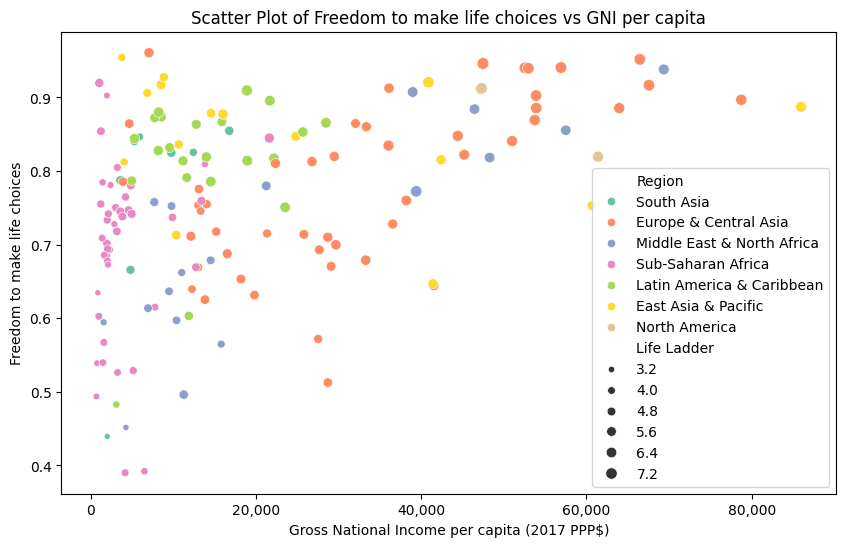

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=consolidate_all_alias, x='GNI per capita', y='Freedom to make life choices', hue='Region',size = 'Life Ladder', palette='Set2')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.title('Scatter Plot of Freedom to make life choices vs GNI per capita')
plt.xlabel('Gross National Income per capita (2017 PPP$)')
plt.ylabel('Freedom to make life choices')

plt.show()

**ความสัมพันธ์ระหว่าง Freedom to make life choices และ Gross National Income per capita (2017 PPP$)**

---

รายได้ประชาชาติต่อหัวที่สูงช่วยเสริมสร้างเสรีภาพในการเลือกใช้ชีวิต ทำให้ประชาชนมีทางเลือกและโอกาสในการพัฒนาชีวิตอย่างมีความสุข ในทางกลับกัน ประเทศที่มีรายได้ต่ำมักประสบปัญหาด้านเสรีภาพ ซึ่งส่งผลให้คุณภาพชีวิตและความสุขของประชาชนต่ำลง

###Freedom to make life choices vs. Life Expectancy at Birth

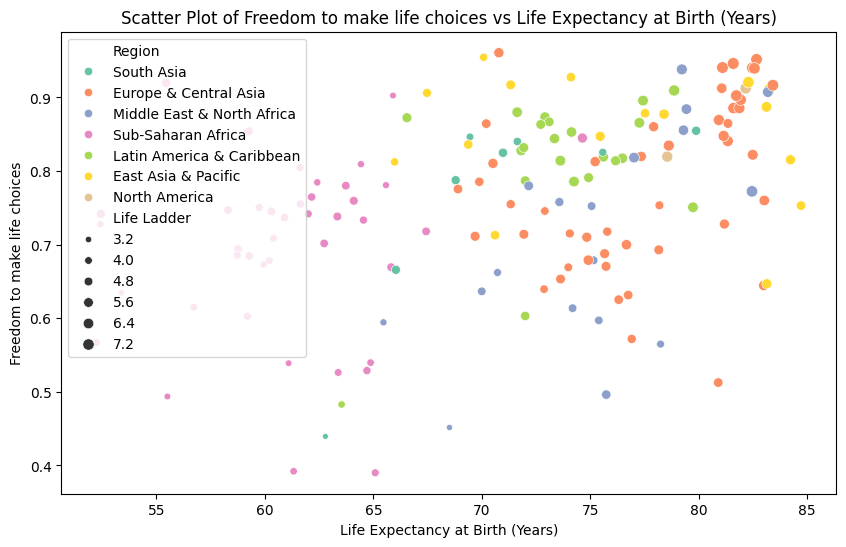

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=consolidate_all_alias, x='life expectancy at birth', y='Freedom to make life choices', hue='Region',size = 'Life Ladder', palette='Set2')

plt.title('Scatter Plot of Freedom to make life choices vs Life Expectancy at Birth (Years)')
plt.xlabel('Life Expectancy at Birth (Years)')
plt.ylabel('Freedom to make life choices')

plt.show()

**ความสัมพันธ์ระหว่าง Freedom to make life choices และ Life Expectancy at Birth**

---

อายุขัยเฉลี่ยที่สูงมีผลสำคัญต่อเสรีภาพในการเลือกใช้ชีวิต เพราะช่วยให้ประชาชนมีโอกาสในการตัดสินใจที่หลากหลายและดีกว่า ในขณะที่ประเทศที่มีอายุขัยเฉลี่ยต่ำจะเผชิญกับความท้าทายด้านสุขภาพและโอกาสที่จำกัด ซึ่งส่งผลให้ความสุขของประชาชนลดลง

###Freedom to make life choices vs. Mean Years of Schooling

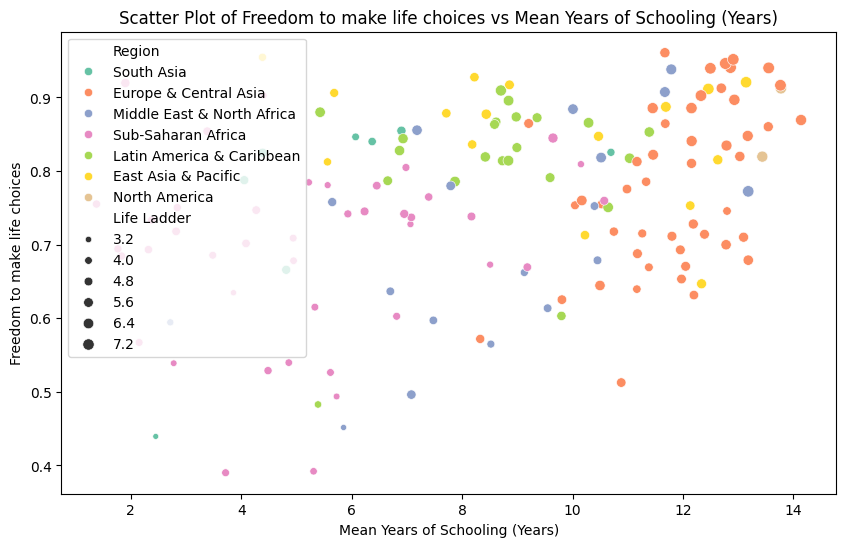

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=consolidate_all_alias, x='Mean Years of Schooling', y='Freedom to make life choices', hue='Region',size = 'Life Ladder', palette='Set2')

plt.title('Scatter Plot of Freedom to make life choices vs Mean Years of Schooling (Years)')
plt.xlabel('Mean Years of Schooling (Years)')
plt.ylabel('Freedom to make life choices')

plt.show()

**ความสัมพันธ์ระหว่าง Freedom to make life choices และ Mean Years of Schooling (Years)**


---

สะท้อนถึงการศึกษาที่ดีทำให้ประชาชนมีโอกาสในการเลือกมากขึ้น มีความมั่นใจในตนเอง
 และสามารถเข้าถึงข้อมูลและทรัพยากรที่จำเป็นต่อการตัดสินใจที่ดีในชีวิต

###Generosity vs. Inequality in Education

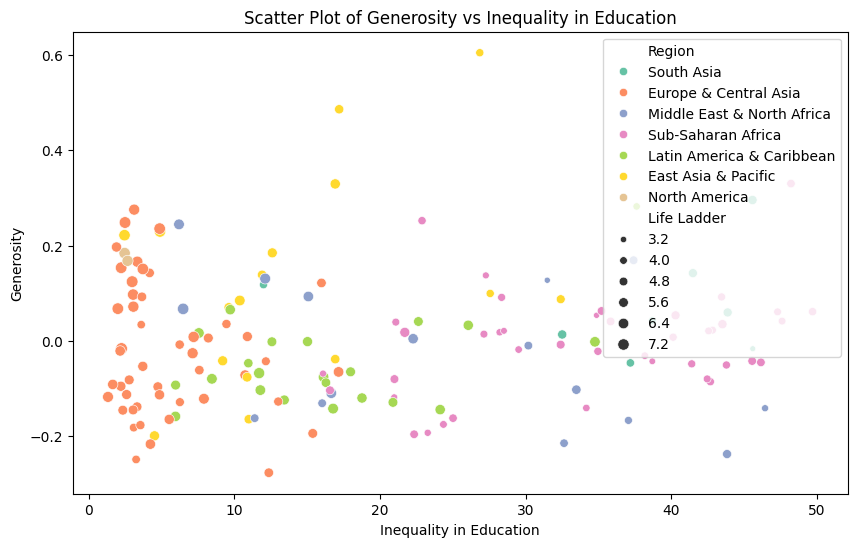

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=consolidate_all_alias, x='Inequality in education', y='Generosity', hue='Region',size = 'Life Ladder', palette='Set2')

plt.title('Scatter Plot of Generosity vs Inequality in Education')
plt.xlabel('Inequality in Education')
plt.ylabel('Generosity')

plt.show()

**ความสัมพันธ์ระหว่าง Generosity และ Inequality in Education**

---


ความเหลื่อมล้ำทางการศึกษาส่งผลต่อความใจดีในสังคม การเข้าถึงการศึกษาที่ดีช่วยเสริมสร้างความสามารถในการเข้าใจและให้ความช่วยเหลือผู้อื่น ส่งผลให้มีสังคมที่มีความสุขมากขึ้น ขณะที่ความเหลื่อมล้ำทางการศึกษาสูงสามารถจำกัดความใจดีและคุณภาพชีวิตของประชาชนได้

###Inequality in education vs. Negative affect

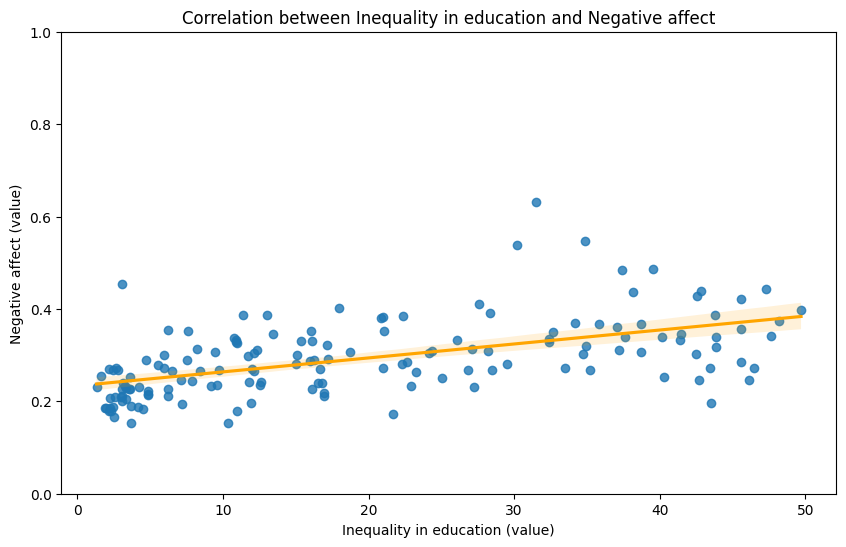

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=consolidate_all_alias, x='Inequality in education', y='Negative affect',
           line_kws={'color': 'orange'})
plt.title('Correlation between Inequality in education and Negative affect')
plt.xlabel('Inequality in education (value)')
plt.ylabel('Negative affect (value)')
plt.ylim(0, 1)
plt.show()

- ความไม่เท่าเทียมในด้านการศึกษา (Inequality in education)แสดงถึงความสัมพันธ์เชิงบวกกับระดับความเครียด (Negative affect) ซึ่งสะท้อนให้เห็นว่าการลดความไม่เท่าเทียมในด้านการศึกษาจะช่วยลดความเครียดหรือความรู้สึกเชิงลบได้
- ข้อมูลนี้ชี้ให้เห็นถึงความสำคัญของการส่งเสริมโอกาสทางการศึกษาในกลุ่มประชากรที่ขาดโอกาส ซึ่งอาจเป็นกลุ่มที่มีความเครียดสูง

###Gross National Income per capita vs. Negative affect

<ipython-input-214-4718945ac81b>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


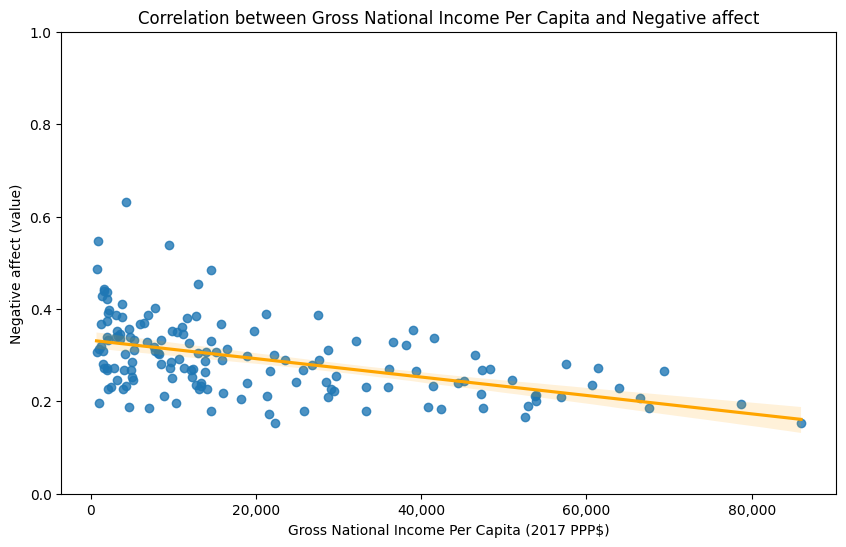

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=consolidate_all_alias, x='GNI per capita', y='Negative affect',
            line_kws={'color': 'orange'})
plt.title('Correlation between Gross National Income Per Capita and Negative affect')
plt.xlabel('Gross National Income Per Capita (2017 PPP$)')
plt.ylabel('Negative affect (value)')
plt.ylim(0, 1)

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

- รายได้ประชาชาติต่อหัว (GNI per capita) ที่สูงขึ้นมีความสัมพันธ์กับระดับความเครียด (Negative affect) ที่ลดลง ซึ่งบ่งบอกว่าความมั่นคงทางเศรษฐกิจมีบทบาทสำคัญในการลดความเครียดในสังคม
- การปรับปรุงด้านเศรษฐกิจและสร้างความมั่นคงทางการเงินสามารถเป็นหนึ่งในแนวทางที่สำคัญในการลดความเครียดของประชากร


###Inequality in life expectancy vs. Negative affect

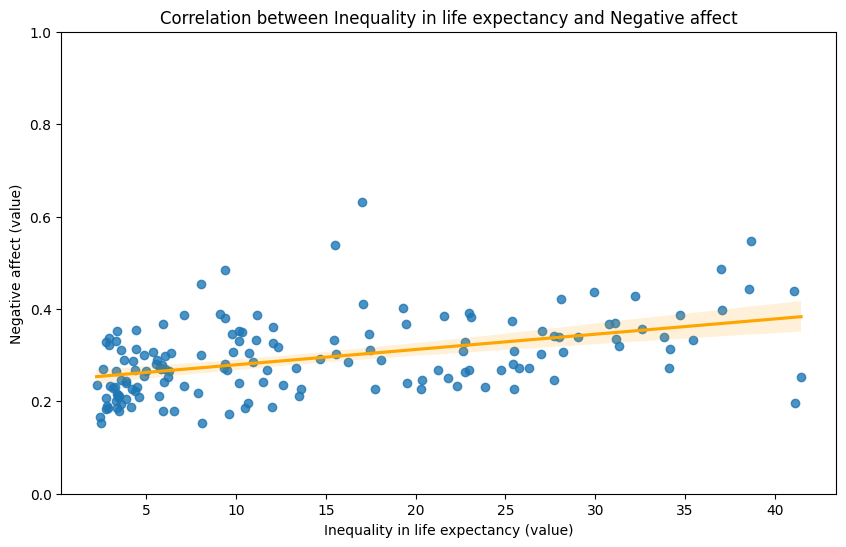

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=consolidate_all_alias, x='Inequality in life expectancy', y='Negative affect',
            line_kws={'color': 'orange'})
plt.title('Correlation between Inequality in life expectancy and Negative affect')
plt.xlabel('Inequality in life expectancy (value)')
plt.ylabel('Negative affect (value)')
plt.ylim(0, 1)
plt.show()

- ความไม่เท่าเทียมในอายุขัย(Inequality in life expectancy)สัมพันธ์กับ ระดับความเครียด (Negative affect) ที่สูงขึ้น ซึ่งสะท้อนถึงความไม่เท่าเทียมในการเข้าถึงบริการสุขภาพที่เป็นธรรม
- การพัฒนาระบบสุขภาพที่ให้การเข้าถึงอย่างเท่าเทียมสามารถช่วยลดความเครียดและสร้างความพึงพอใจในชีวิตให้กับประชากรได้

###life expectancy at birth vs. Negative affect

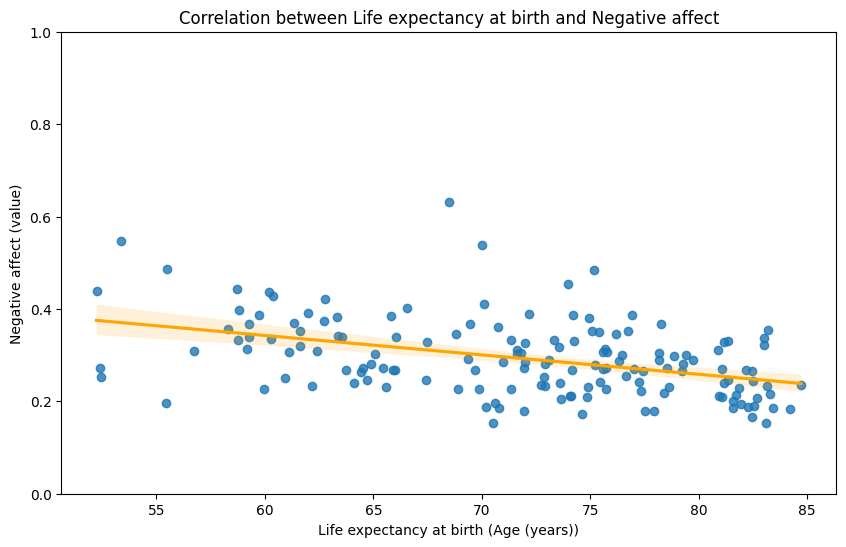

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=consolidate_all_alias, x='life expectancy at birth', y='Negative affect',
            line_kws={'color': 'orange'})
plt.title('Correlation between Life expectancy at birth and Negative affect')
plt.xlabel('Life expectancy at birth (Age (years))')
plt.ylabel('Negative affect (value)')
plt.ylim(0, 1)
plt.show()

- อายุขัยเฉลี่ย (life expectancy at birth) ที่สูงขึ้นมีความสัมพันธ์เชิงลบกับ ระดับความเครียด (Negative affect) ซึ่งบ่งบอกว่าเมื่อประชากรมีอายุขัยที่ยืนยาวขึ้น พวกเขามีแนวโน้มที่จะเครียดน้อยลง
- การส่งเสริมสุขภาพและยกระดับคุณภาพชีวิตให้มีความยั่งยืนและแข็งแกร่งจะช่วยลดปัญหาทางอารมณ์ได้อย่างยั่งยืน

สรุป:
- การส่งเสริมโอกาสทางการศึกษา การพัฒนาความมั่นคงทางเศรษฐกิจ และการสร้างระบบสุขภาพที่เท่าเทียมและครอบคลุม จะสามารถช่วยลดปัจจัยที่ส่งผลต่อความเครียดในสังคมได้
- การพิจารณาปัจจัยหลายด้านร่วมกันในการลดความเครียดจะช่วยให้เห็นถึงแนวทางที่ครอบคลุมและยั่งยืนมากขึ้น การมุ่งเน้นเพียงปัจจัยเดียวอาจไม่เพียงพอ แต่การพัฒนาแบบองค์รวมจะช่วยให้ประชากรมีความสุขและความพึงพอใจในชีวิตมากขึ้น

## Chapter 3: Top 10 Life Ladder vs. Thailand

In [ ]:
top10_life_ladder_vs_tha = consolidate_all_alias[(consolidate_all_alias['Life Ladder Rank'] <= 10) | (consolidate_all_alias['Country Code'] == "THA")].sort_values('Life Ladder', ascending=False)

###Life Ladder

<ipython-input-218-6d81c98d9b36>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_life_ladder_vs_tha, x='Life Ladder', y='Country Name', palette=colors)  # ใช้สีที่กำหนด


<Figure size 1000x600 with 0 Axes>

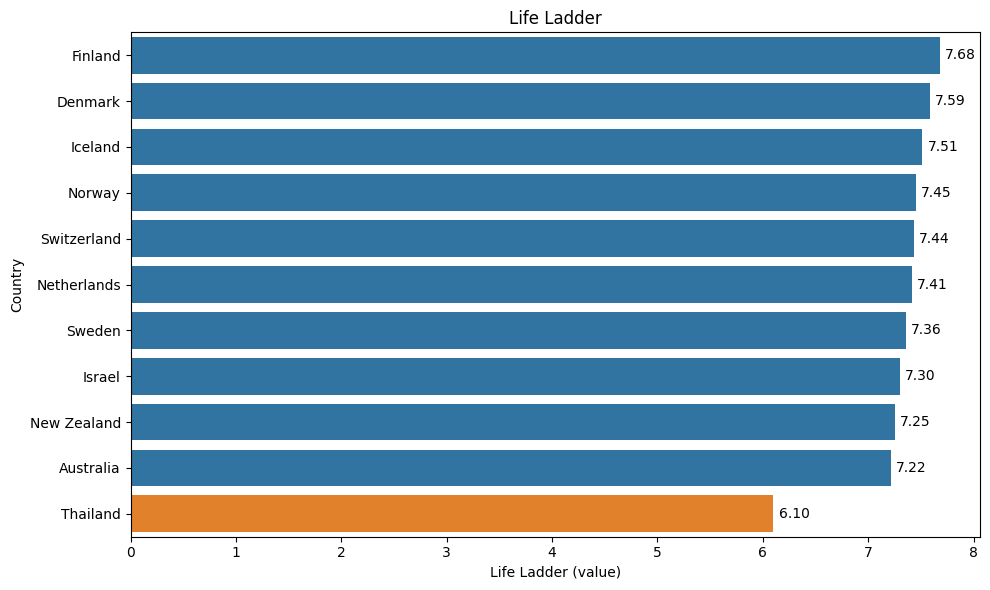

In [ ]:
colors = ['#ff7f0e' if country == 'Thailand' else '#1f77b4' for country in top10_life_ladder_vs_tha['Country Name']]

plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top10_life_ladder_vs_tha, x='Life Ladder', y='Country Name', palette=colors)  # ใช้สีที่กำหนด

for i, (value, country) in enumerate(zip(top10_life_ladder_vs_tha['Life Ladder'], top10_life_ladder_vs_tha['Country Name'])):
    ax.text(value + 0.05, i, f'{value:.2f}', va='center')

plt.title('Life Ladder')
plt.xlabel('Life Ladder (value)')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

ส่วนใหญ่ประเทศที่อยู่ใน Top 10 Life Ladder อยู่ใน Europe & Central Asia
และประเทศไทยมีค่าความพึงพอใจอยู่ที่ 6.10 ซึ่งต่ำกว่าค่าเฉลี่ยของ 10 ประเทศที่มีความพึงพอใจในชีวิตสูงสุดอย่างชัดเจน (ทุกประเทศใน Top 10 มีค่าความพึงพอใจมากกว่า 7.0)

###Gross National Income Per Capita

<ipython-input-219-a74b11937e76>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_life_ladder_vs_tha, x='GNI per capita', y='Country Name', palette=colors)  # ใช้สีที่กำหนด


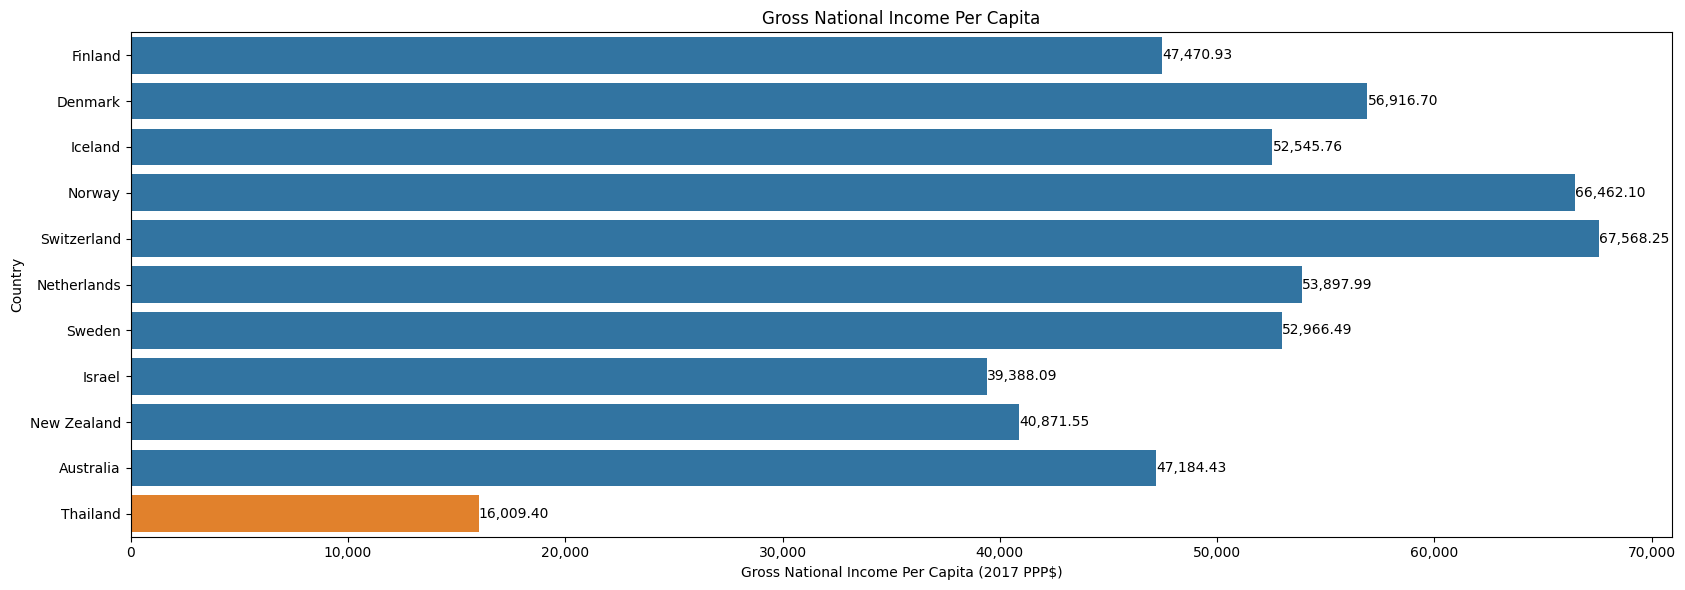

In [ ]:
colors = ['#ff7f0e' if country == 'Thailand' else '#1f77b4' for country in top10_life_ladder_vs_tha['Country Name']]

plt.figure(figsize=(17, 6))
ax = sns.barplot(data=top10_life_ladder_vs_tha, x='GNI per capita', y='Country Name', palette=colors)  # ใช้สีที่กำหนด
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

for i, (value, country) in enumerate(zip(top10_life_ladder_vs_tha['GNI per capita'], top10_life_ladder_vs_tha['Country Name'])):
    ax.text(value + 1.05, i, f'{value:,.2f}', va='center')

plt.title('Gross National Income Per Capita')
plt.xlabel('Gross National Income Per Capita (2017 PPP$)')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

- ประเทศไทยมี GNI per capita อยู่ที่ 16,0009.40 USD ซึ่งกว่าประเทศใน Top 10 อย่างเห็นได้ชัด
- อันดับที่ 1 คือประเทศสวิตเซอร์แลนด์ อยู่ที่ 67,568.25 USD ซึ่งมากกว่าประเทศไทยถึง 4 เท่า

###Perceptions of corruption

<ipython-input-220-88c2a3d2d128>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_life_ladder_vs_tha, x='Perceptions of corruption', y='Country Name', palette=colors)  # ใช้สีที่กำหนด


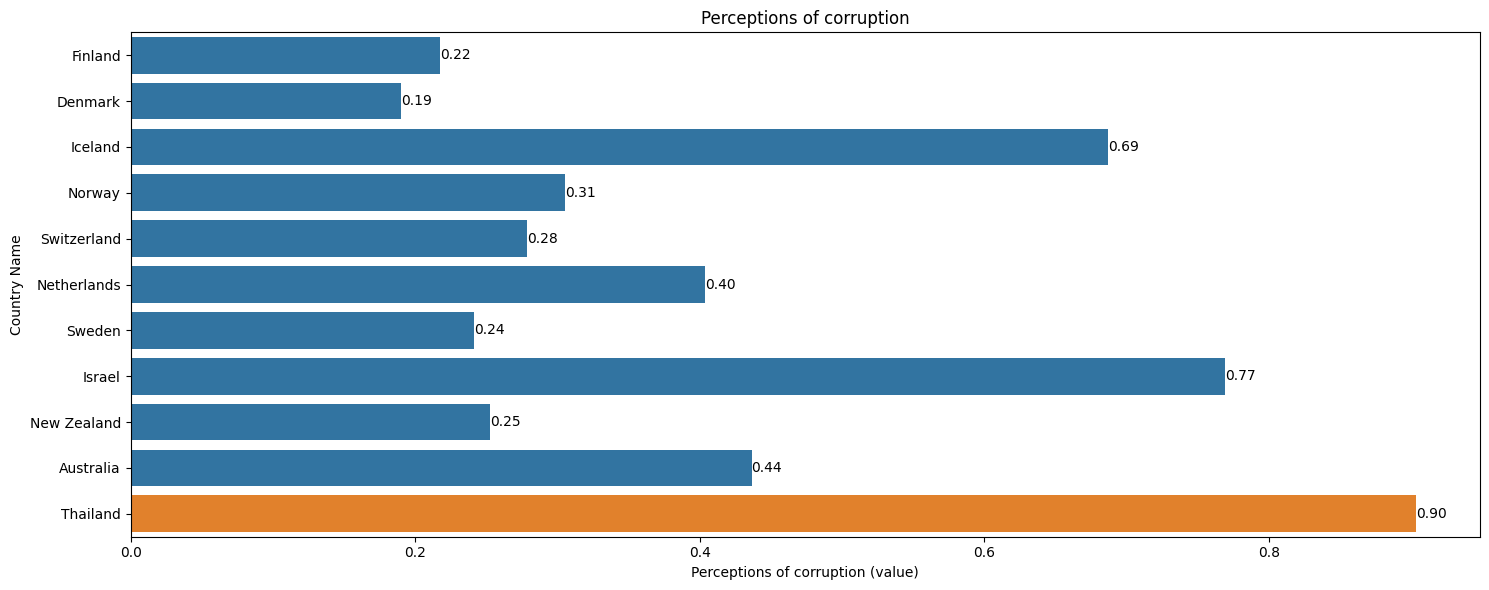

In [ ]:
colors = ['#ff7f0e' if country == 'Thailand' else '#1f77b4' for country in top10_life_ladder_vs_tha['Country Name']]

plt.figure(figsize=(15, 6))
ax = sns.barplot(data=top10_life_ladder_vs_tha, x='Perceptions of corruption', y='Country Name', palette=colors)  # ใช้สีที่กำหนด

for i, (value, country) in enumerate(zip(top10_life_ladder_vs_tha['Perceptions of corruption'], top10_life_ladder_vs_tha['Country Name'])):
    ax.text(value, i, f'{value:,.2f}', va='center')

plt.title('Perceptions of corruption')
plt.xlabel('Perceptions of corruption (value)')
plt.ylabel('Country Name')

plt.tight_layout()
plt.show()

- ฟินแลนด์ (0.22), เดนมาร์ก (0.19) และ สวีเดน (0.24) เป็นประเทศที่มีการรับรู้ถึงการคอร์รัปชันต่ำ และเป็นประเทศที่มี Life Ladder สูงมาก การรับรู้ถึงการคอร์รัปชันที่ต่ำในประเทศเหล่านี้ช่วยสร้างความเชื่อมั่นในระบบการปกครองและองค์กร ซึ่งส่งผลต่อคุณภาพชีวิตที่ดีขึ้น
- ประเทศไทยมีค่า Perception of Corruption สูงถึง 0.90 แสดงให้เห็นว่าการรับรู้ถึงการทุจริตในประเทศไทยยังคงเป็นปัญหาหลักที่อาจส่งผลกระทบต่อความไว้วางใจในรัฐบาลและองค์กรต่างๆ ซึ่งอาจเป็นปัจจัยที่ขัดขวางการพัฒนาคุณภาพชีวิตของประชาชน

###Inequality in income

<ipython-input-221-dddf11672f15>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_life_ladder_vs_tha, x='Inequality in income', y='Country Name', palette=colors)  # ใช้สีที่กำหนด


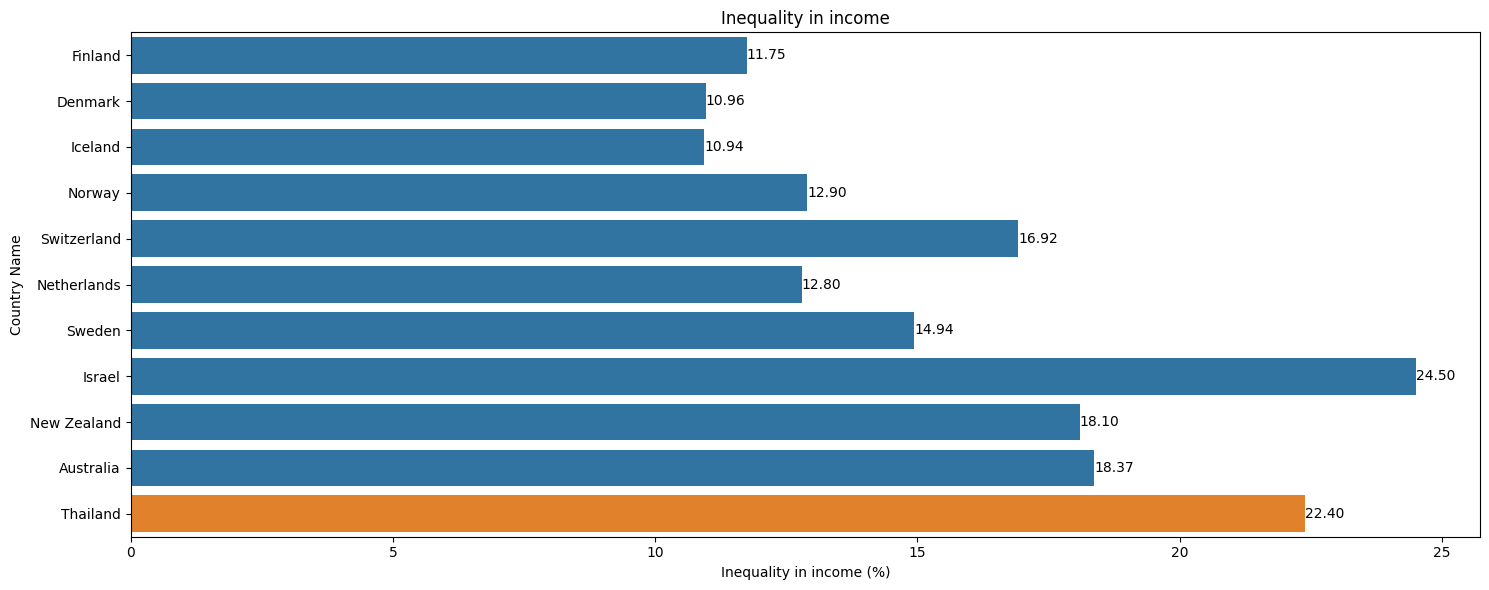

In [ ]:
colors = ['#ff7f0e' if country == 'Thailand' else '#1f77b4' for country in top10_life_ladder_vs_tha['Country Name']]

plt.figure(figsize=(15, 6))
ax = sns.barplot(data=top10_life_ladder_vs_tha, x='Inequality in income', y='Country Name', palette=colors)  # ใช้สีที่กำหนด

for i, (value, country) in enumerate(zip(top10_life_ladder_vs_tha['Inequality in income'], top10_life_ladder_vs_tha['Country Name'])):
    ax.text(value, i, f'{value:,.2f}', va='center')

plt.title('Inequality in income')
plt.xlabel('Inequality in income (%)')
plt.ylabel('Country Name')

plt.tight_layout()
plt.show()

- ประเทศไทยมีความไม่เท่าเทียมทางรายได้สูงถึง 22.40% ซึ่งถือว่าสูงเมื่อเปรียบเทียบกับประเทศใน Top 10 โดยเฉพาะเมื่อเทียบกับประเทศอย่าง ไอซ์แลนด์ (10.94%), เดนมาร์ก (10.96%), และ ฟินแลนด์ (11.75%)

- ประเทศอิสราเอลมีความไม่เท่าเทียมทางรายได้สูงถึง 24.50% ซึ่งสูงกว่าประเทศอื่นๆ ในกลุ่ม Top 10 แต่ยังคงมีความพึงพอใจในชีวิตสูง แสดงถึงการที่ความไม่เท่าเทียมทางรายได้ไม่ได้เป็นปัจจัยที่ส่งผลโดยตรงเสมอไปต่อ Life Ladder

###Mean Years of Schooling

<ipython-input-222-8c2e1bf11620>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_life_ladder_vs_tha, x='Mean Years of Schooling', y='Country Name', palette=colors)  # ใช้สีที่กำหนด


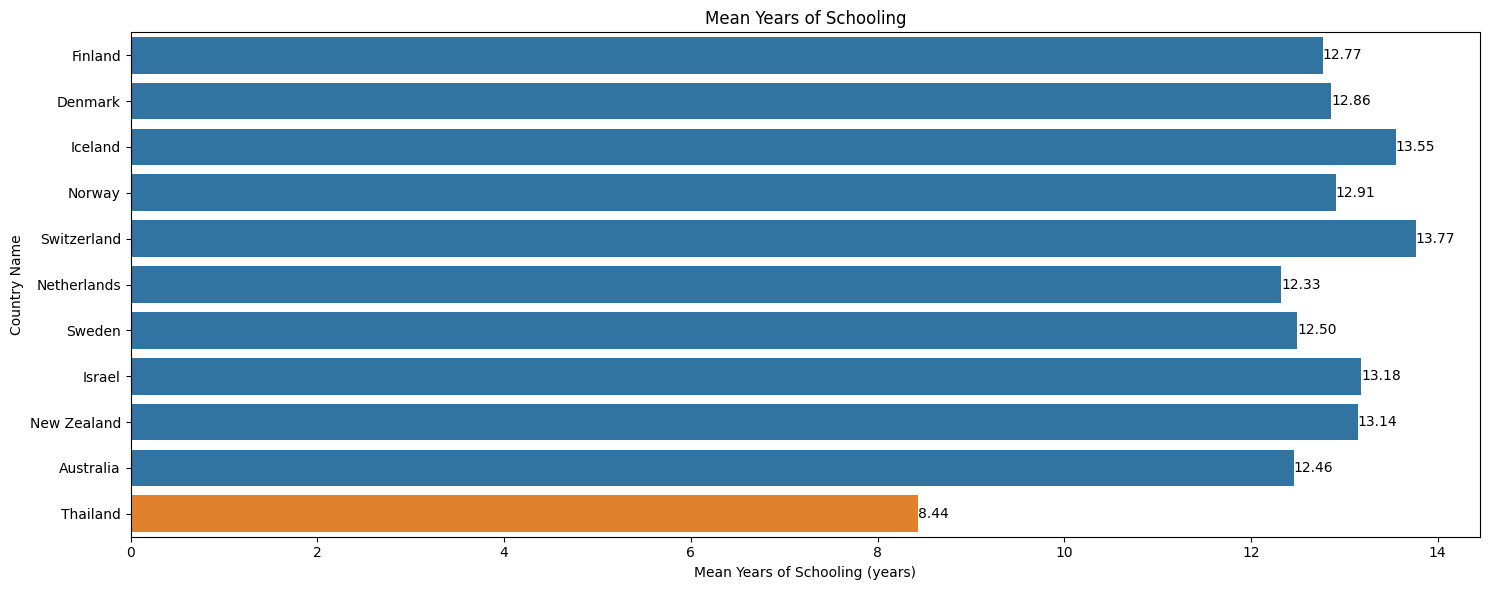

In [ ]:
colors = ['#ff7f0e' if country == 'Thailand' else '#1f77b4' for country in top10_life_ladder_vs_tha['Country Name']]

plt.figure(figsize=(15, 6))
ax = sns.barplot(data=top10_life_ladder_vs_tha, x='Mean Years of Schooling', y='Country Name', palette=colors)  # ใช้สีที่กำหนด

for i, (value, country) in enumerate(zip(top10_life_ladder_vs_tha['Mean Years of Schooling'], top10_life_ladder_vs_tha['Country Name'])):
    ax.text(value, i, f'{value:,.2f}', va='center')

plt.title('Mean Years of Schooling')
plt.xlabel('Mean Years of Schooling (years)')
plt.ylabel('Country Name')

plt.tight_layout()
plt.show()

- ประเทศไทยมีค่า Mean Years of Schooling อยู่ที่ 8.44 ปี ซึ่งต่ำกว่าค่าเฉลี่ยของประเทศในกลุ่ม Top 10 ที่มีค่าเฉลี่ยมากกว่า 12 ปี
- ประเทศที่มีค่าเฉลี่ยการศึกษาสูงที่สุดคือ สวิตเซอร์แลนด์ ที่ 13.77 ปี และ ไอซ์แลนด์ ที่ 13.55 ปี
- ค่าเฉลี่ยการศึกษาที่ต่ำของประเทศไทยเมื่อเทียบกับกลุ่มประเทศที่มี Life Ladder สูงบ่งบอกถึงข้อจำกัดในการเข้าถึงการศึกษาอย่างเท่าเทียม และเป็นหนึ่งในปัจจัยที่อาจส่งผลให้ความพึงพอใจในชีวิตยังไม่สูงเทียบเท่ากับประเทศที่พัฒนาแล้ว

###Positive affect

<ipython-input-223-fee7c6ca12bd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_life_ladder_vs_tha, x='Positive affect', y='Country Name', palette=colors)  # ใช้สีที่กำหนด


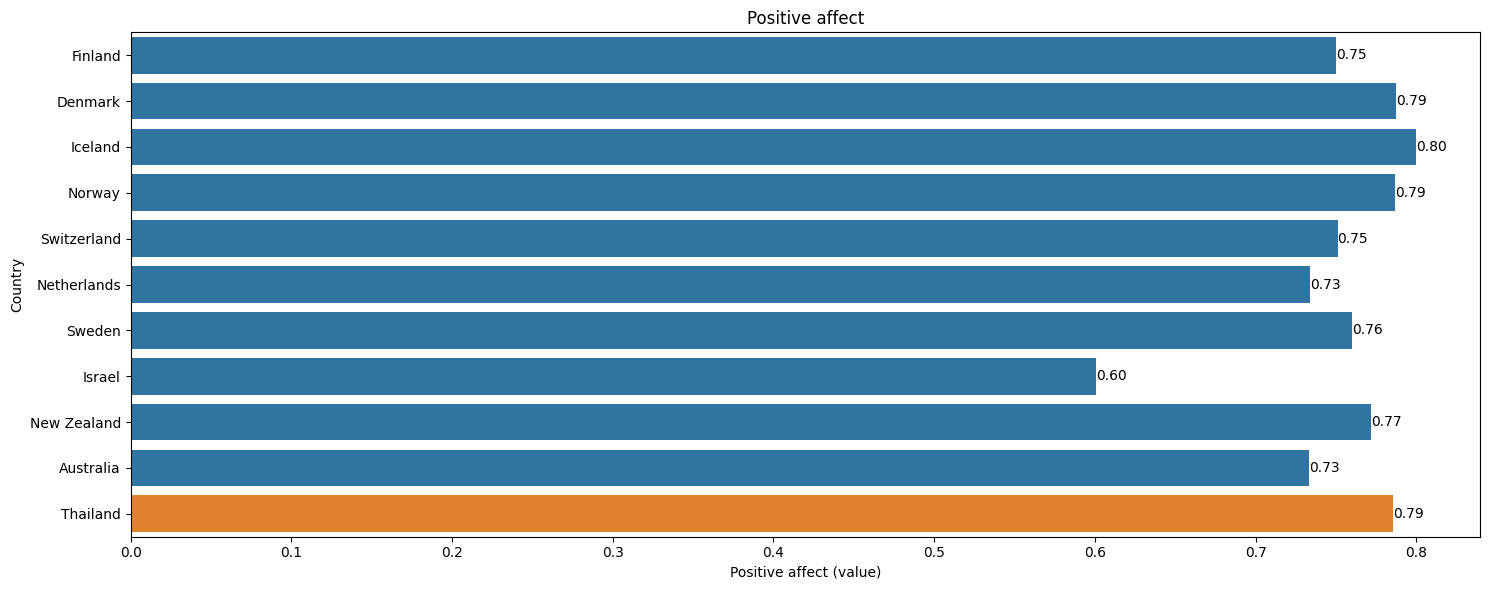

In [ ]:
colors = ['#ff7f0e' if country == 'Thailand' else '#1f77b4' for country in top10_life_ladder_vs_tha['Country Name']]

plt.figure(figsize=(15, 6))
ax = sns.barplot(data=top10_life_ladder_vs_tha, x='Positive affect', y='Country Name', palette=colors)  # ใช้สีที่กำหนด

for i, (value, country) in enumerate(zip(top10_life_ladder_vs_tha['Positive affect'], top10_life_ladder_vs_tha['Country Name'])):
    ax.text(value, i, f'{value:,.2f}', va='center')

plt.title('Positive affect')
plt.xlabel('Positive affect (value)')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

- ประเทศไทยมีค่า Positive Affect ที่ 0.79 ซึ่งถือว่าค่อนข้างสูงเทียบเท่ากับประเทศที่มี Life Ladder สูงอย่าง เดนมาร์ก และ ไอซ์แลนด์ ที่มีค่า Positive Affect เท่ากัน
- ประเทศไทยได้รับการขนานนามว่า “Land of Smiles” ซึ่งสะท้อนถึงวัฒนธรรมแห่งความมีน้ำใจและความสุขทางอารมณ์ที่สูง สอดคล้องกับค่า Positive Affect ที่ดี
- ประเทศอิสราเอลมีค่า Positive Affect ต่ำที่สุดที่ 0.60 เมื่อเทียบกับประเทศอื่นในกลุ่ม Top 10 แม้ว่าจะมี ความพึงพอใจในชีวิตสูง แสดงถึงความไม่สอดคล้องระหว่างความสุขทางอารมณ์และความพึงพอใจในชีวิต
- แม้ประเทศไทยจะมี GNI per capita ที่ต่ำกว่าเมื่อเทียบกับประเทศในกลุ่ม Top 10 แต่ค่า Positive Affect ของไทยยังคงอยู่ในระดับสูง แสดงให้เห็นว่าความสุขทางอารมณ์ของประชากรไม่ได้ขึ้นอยู่กับปัจจัยทางเศรษฐกิจเสมอไป

###Negative Affect

<ipython-input-224-178aac733fee>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_life_ladder_vs_tha, x='Negative affect', y='Country Name', palette=colors)  # ใช้สีที่กำหนด


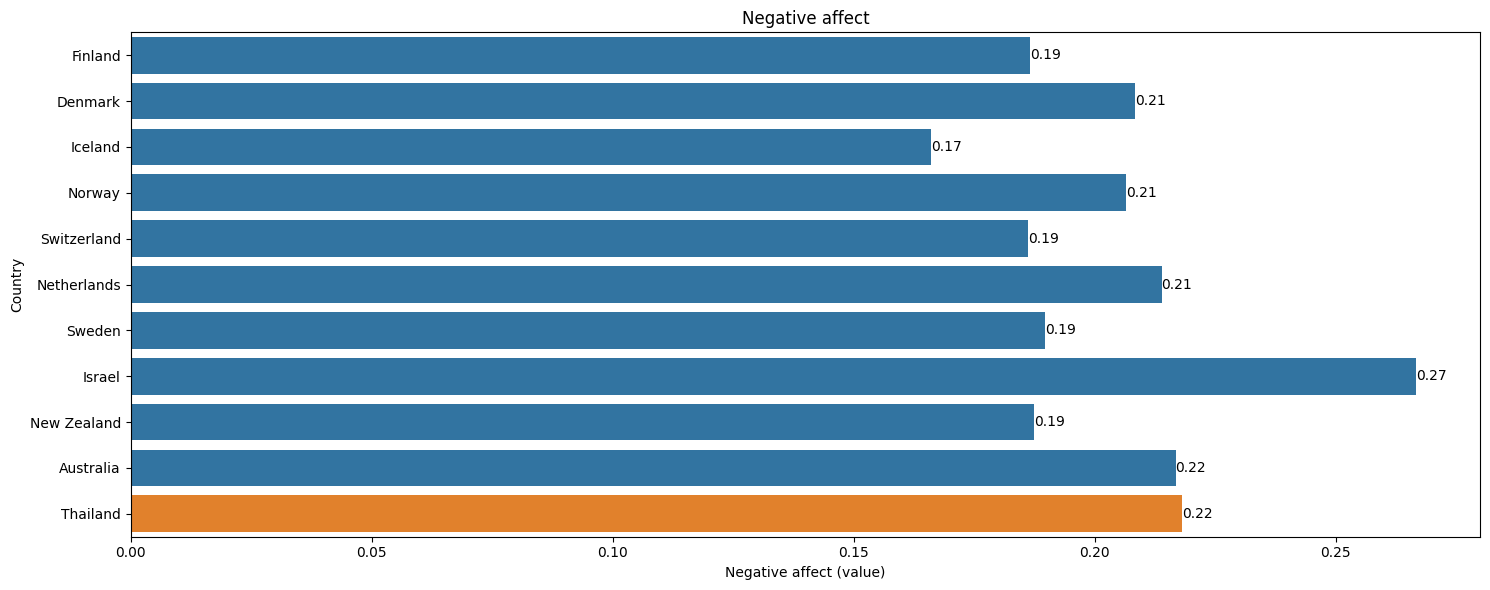

In [ ]:
colors = ['#ff7f0e' if country == 'Thailand' else '#1f77b4' for country in top10_life_ladder_vs_tha['Country Name']]

plt.figure(figsize=(15, 6))
ax = sns.barplot(data=top10_life_ladder_vs_tha, x='Negative affect', y='Country Name', palette=colors)  # ใช้สีที่กำหนด

for i, (value, country) in enumerate(zip(top10_life_ladder_vs_tha['Negative affect'], top10_life_ladder_vs_tha['Country Name'])):
    ax.text(value, i, f'{value:,.2f}', va='center')

plt.title('Negative affect')
plt.xlabel('Negative affect (value)')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

- ประเทศไทยมีค่า Negative Affect อยู่ที่ 0.22 ซึ่งสูงกว่า นิวซีแลนด์, สวิตเซอร์แลนด์, และ ฟินแลนด์ ซึ่งมีค่าอยู่ที่ 0.19 โดยกราฟนี้แสดงถึงความรู้สึกเชิงลบของประชาชน เช่น ความเครียด ความกังวล หรือความเศร้า
- ประเทศอิสราเอลมีค่า Negative Affect สูงสุดที่ 0.27 แสดงถึงความเครียดหรือความรู้สึกเชิงลบที่มากขึ้น แม้ว่าจะเป็นประเทศที่มีค่าความพึงพอใจในชีวิตสูงก็ตาม แสดงให้เห็นว่าการมีความพึงพอใจในชีวิตที่ดีไม่ได้หมายความว่าความรู้สึกเชิงลบจะน้อยลงเสมอไป (?)
- แม้ว่าประเทศไทยมีค่า Positive Affect ที่สูงตามชื่อ “Land of Smiles” แต่การมีค่า Negative Affect สูงแสดงให้เห็นถึงความจำเป็นในการจัดการความเครียดหรือปัญหาสังคมที่อาจส่งผลต่อสุขภาพจิตของประชาชน

###Inequality-adjusted Human Development Index

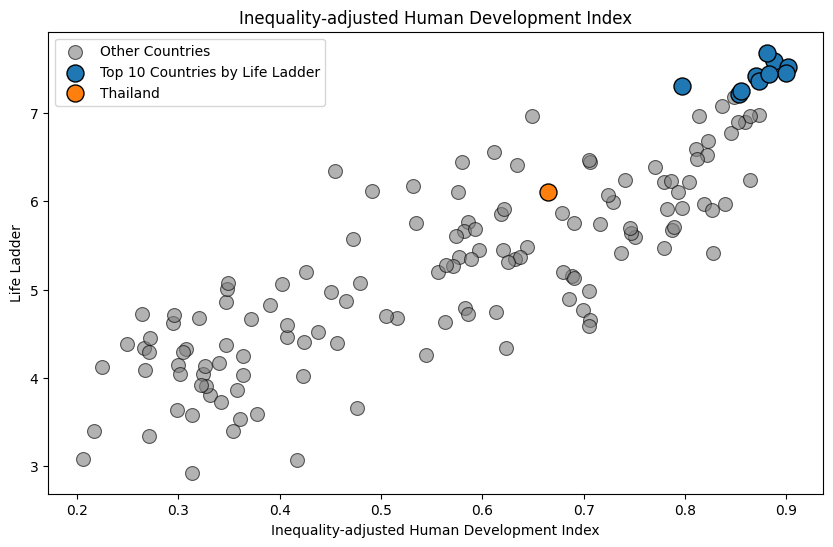

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=consolidate_all_alias[(consolidate_all_alias['Country Name'] != 'Thailand') & (consolidate_all_alias['Life Ladder Rank'] > 10)],
    x='Inequality-adjusted Human Development Index',
    y='Life Ladder',
    color='grey',
    s=100,
    edgecolor='black',
    alpha=0.6,
    label='Other Countries'
)

sns.scatterplot(
    data=consolidate_all_alias[(consolidate_all_alias['Country Name'] != 'Thailand') & (consolidate_all_alias['Life Ladder Rank'] <= 10)],
    x='Inequality-adjusted Human Development Index',
    y='Life Ladder',
    color='#1f77b4',
    s=150,
    edgecolor='black',
    alpha=1.0,
    label='Top 10 Countries by Life Ladder'
)

sns.scatterplot(
    data=consolidate_all_alias[consolidate_all_alias['Country Name'] == 'Thailand'],
    x='Inequality-adjusted Human Development Index',
    y='Life Ladder',
    color='#ff7f0e',
    s=150,
    edgecolor='black',
    alpha=1.0,
    label='Thailand'
)

plt.title('Inequality-adjusted Human Development Index')
plt.xlabel('Inequality-adjusted Human Development Index')
plt.ylabel('Life Ladder')

plt.legend()
plt.show()

- IHDI สูงสัมพันธ์กับ Life Ladder สูง
	- กราฟแสดงให้เห็นถึงความสัมพันธ์เชิงบวกระหว่าง IHDI และ Life Ladder ยิ่งค่า IHDI สูง (ค่าที่ปรับความไม่เท่าเทียมของการพัฒนามนุษย์) ประเทศนั้นก็จะมีความพึงพอใจในการใช้ชีวิตที่สูงขึ้นเช่นกัน เช่น ประเทศในวงกลมสีน้ำเงินมีค่า IHDI สูงกว่า 0.8 และมีค่า Life Ladder เกิน 7.0 ซึ่งเป็นสัญญาณของคุณภาพชีวิตที่ดีและประชากรมีความพึงพอใจในชีวิตมากขึ้น
- IHDI ต่ำสัมพันธ์กับ Life Ladder ต่ำ
	- ประเทศที่มีค่า IHDI ต่ำกว่า 0.4 จะเห็นได้ว่าค่า Life Ladder มักจะต่ำกว่า 5.0 ซึ่งแสดงถึงความไม่เท่าเทียมในโอกาสทางการศึกษา สุขภาพ และรายได้ และส่งผลให้ประชาชนมีความพึงพอใจในชีวิตน้อยลง โดยเฉพาะกลุ่มประเทศที่ค่า IHDI ต่ำกว่า 0.3 จะมี Life Ladder อยู่เพียงประมาณ 3-4 เท่านั้น
- ประเทศไทยอยู่ในระดับกลาง:
	- ประเทศไทย (วงกลมสีส้ม) มีค่า IHDI ประมาณ 0.55 และค่า Life Ladder อยู่ที่ประมาณ 6.0 ซึ่งจัดอยู่ในระดับกลาง เมื่อเปรียบเทียบกับประเทศที่มีค่า IHDI สูง จะเห็นได้ว่า ประเทศไทยยังคงมีช่องว่างในการปรับปรุงเพื่อลดความไม่เท่าเทียมในด้านต่างๆ เช่น การศึกษาและรายได้ ซึ่งจะช่วยยกระดับความพึงพอใจในการใช้ชีวิตของประชาชนได้

การพัฒนาคุณภาพชีวิตของประเทศไทยในระยะยาวจะต้องเน้นไปที่การลดความไม่เท่าเทียมในมิติของรายได้ การศึกษา และการลดปัญหาคอร์รัปชัน การมุ่งเน้นไปที่การสร้างสังคมที่เท่าเทียมและเปิดโอกาสให้ทุกคนเข้าถึงทรัพยากรและโอกาสทางเศรษฐกิจจะช่วยให้ประเทศไทยสามารถเพิ่ม Life Ladder และคุณภาพชีวิตของประชาชนได้ใกล้เคียงกับประเทศในกลุ่ม Top 10